# Ford Go Bike System Data
## by Hazem Mohammed

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [54]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from copy import copy
import datetime 

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [55]:
# Reading the data
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [56]:
# The information about the data (shape, datatypes, column names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [57]:
# The mathimatical describtion of all numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [58]:
# The columns containing null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [59]:
# The percentage of rows containing null values in each column
round((df.isna().sum() / df.shape[0]) * 100, 2)

duration_sec               0.00
start_time                 0.00
end_time                   0.00
start_station_id           0.11
start_station_name         0.11
start_station_latitude     0.00
start_station_longitude    0.00
end_station_id             0.11
end_station_name           0.11
end_station_latitude       0.00
end_station_longitude      0.00
bike_id                    0.00
user_type                  0.00
member_birth_year          4.51
member_gender              4.51
bike_share_for_all_trip    0.00
dtype: float64

### Create DF2
**I will drop the rows with stations that are null values, since they are only a very small percentage of the data.**

In [60]:
# Creating a second dataframe after dropping null values in station columns and converting float ids to integers
df2 = df.drop(df[df['start_station_name'].isnull()].index)
df2.reset_index(inplace=True, drop=True)
df2.start_station_id = df2.start_station_id.astype(int)
df2.end_station_id = df2.end_station_id.astype(int)
df2.shape

(183215, 16)

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_time               183215 non-null  object 
 2   end_time                 183215 non-null  object 
 3   start_station_id         183215 non-null  int32  
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183215 non-null  float64
 6   start_station_longitude  183215 non-null  float64
 7   end_station_id           183215 non-null  int32  
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183215 non-null  float64
 10  end_station_longitude    183215 non-null  float64
 11  bike_id                  183215 non-null  int64  
 12  user_type                183215 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [62]:
df2.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [63]:
# Checking that rows containing null values in both birth year and gender columns 
df2[df2['member_birth_year'].isnull() & df2['member_gender'].isnull()].shape

(8263, 16)

### What is the structure of your dataset?

> There are 183,412 bike rides with 16 features describing each indiviual ride like:<br><br>
    - duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude,
    start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude,
    bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip.<br><br>
    - Most variables are categorical except for the trip duration 'duration_sec' and the start and end stations longtiude and latitude and the member birth year


### What is/are the main feature(s) of interest in your dataset?

> I am most intersted in figuring the patterns in the data:
> - The rush hours.
> - Most busy stations.
> - Types of users.
> - Most busy days whether the workdays or weekends.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip duration.<br>
> Start and end station names.<br>
> User types.<br>

## Univariate Exploration

> In this section, I will investigate the distributions of individual variables.

In [64]:
# Picking a color palette for visualization 
color = sb.color_palette('pastel')
color

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [65]:
# A Function to return top 10 or 20, ..etc of values and their counts
def top_count(number, data_column):
    top_num = {}
    for i in range(number):
        key   = df2[data_column].value_counts().index[i]
        value = df2[data_column].value_counts().values[i]
        top_num[key] = value
    
    return top_num

#### `1.` Ride Duration 

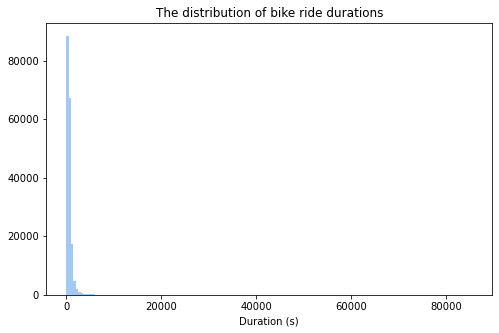

In [66]:
# The distribution of bike ride durations in seconds
binsize = 500
bins = np.arange(0, df2['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=(8,5))
plt.hist(data=df2, x='duration_sec', bins=bins, color=color[0])
plt.title('The distribution of bike ride durations')
plt.xlabel('Duration (s)')
plt.show()

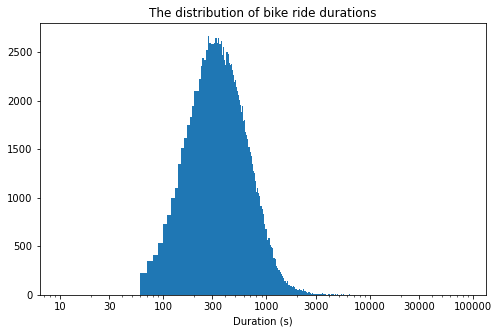

In [67]:
# The distribution of bike ride durations in seconds after applying log transformation on y-axis
binsize = 10
bins = np.arange(0, df2['duration_sec'].max()+binsize, binsize)
ticks = [10,30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(8,5))
plt.hist(data=df2, x='duration_sec', bins=bins)
plt.title('The distribution of bike ride durations')
plt.xlabel('Duration (s)')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.show()

In [68]:
# Generating new column with bike ride duration in minutes
df2['duration_min'] = round(df2.duration_sec / 60, 2)

In [69]:
df2.duration_min.describe()

count    183215.000000
mean         12.098360
std          29.917982
min           1.020000
25%           5.420000
50%           8.570000
75%          13.270000
max        1424.070000
Name: duration_min, dtype: float64

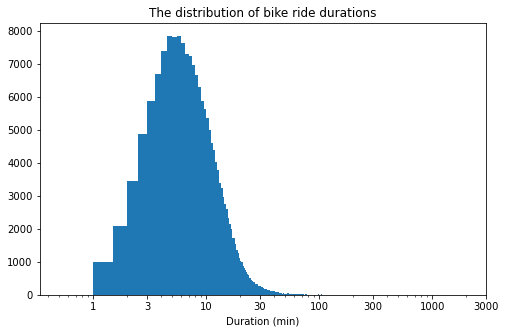

In [70]:
# The distribution of bike ride durations in minutes after applying log transformation on y-axis
binsize = 0.5
bins = np.arange(0, df2['duration_min'].max()+binsize, binsize)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(8,5))
plt.hist(data=df2, x='duration_min', bins=bins)
plt.title('The distribution of bike ride durations')
plt.xlabel('Duration (min)')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.show()

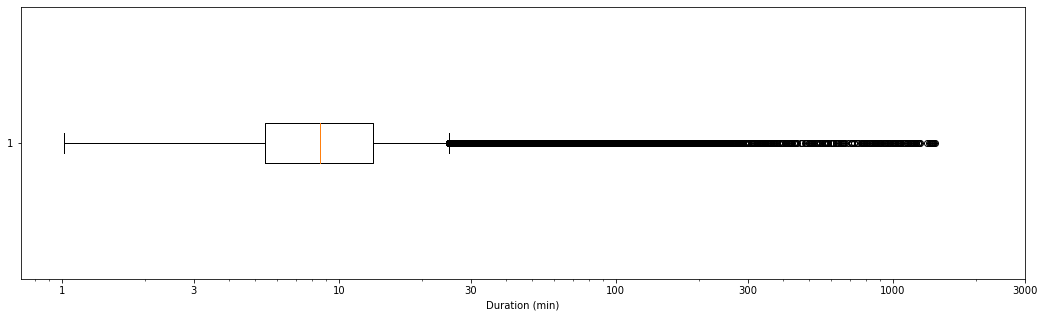

In [71]:
# Creating a box plot to understand the outliers 
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(18,5))
plt.boxplot(data=df2, x='duration_min', vert=False)
plt.xlabel('Duration (min)')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.show()

In [72]:
# Generating new column with bike ride duration in hours
df2['duration_hour'] = round(df2.duration_sec / 3600, 2)

In [73]:
df2.duration_hour.describe()

count    183215.000000
mean          0.201648
std           0.498648
min           0.020000
25%           0.090000
50%           0.140000
75%           0.220000
max          23.730000
Name: duration_hour, dtype: float64

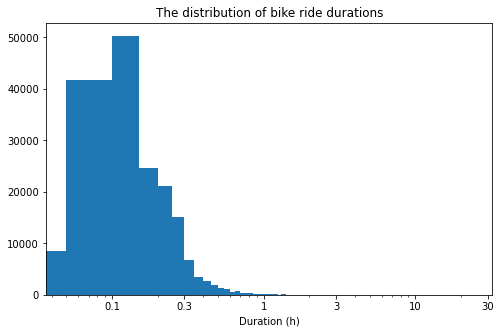

In [74]:
# The distribution of bike ride durations in hours after applying log transformation on y-axis
binsize = 0.05
bins = np.arange(0, df2['duration_hour'].max()+binsize, binsize)
ticks = [0.1, 0.3, 1, 3, 10, 30]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(8,5))
plt.hist(data=df2, x='duration_hour', bins=bins)
plt.title('The distribution of bike ride durations')
plt.xlabel('Duration (h)')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.show()

>**We can see from the charts above that the ride duration are mostly between 1 and 30 minutes, but there are bike rides that go longer than that.**

#### `2.` Start Station

In [75]:
# Number of unique start stations
df2.start_station_name.nunique()

329

In [76]:
# The top 10 start stations according to count of bike rides
start_station_10 = top_count(10, 'start_station_name')

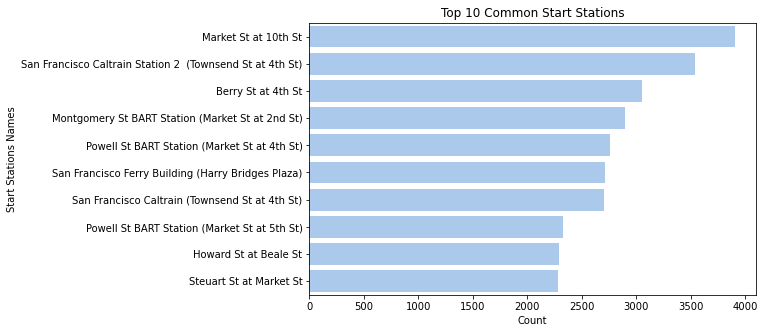

In [77]:
# Displaying the top 10 start stations according to count of bike rides
start_station_10 = top_count(10, 'start_station_name')
plt.figure(figsize=(8,5))
sb.barplot(y=list(start_station_10.keys()), x=list(start_station_10.values()), color=color[0])
plt.ylabel('Start Stations Names')
plt.xlabel('Count')
plt.title('Top 10 Common Start Stations')
plt.show()

>**There are 329 different stations, I displayed the top 10 start stations according to count of bike rides.**

#### `3` End Station

In [78]:
df2.end_station_name.nunique()

329

In [79]:
# The top 10 end stations according to count of bike rides
end_station_10 = top_count(10, 'end_station_name')

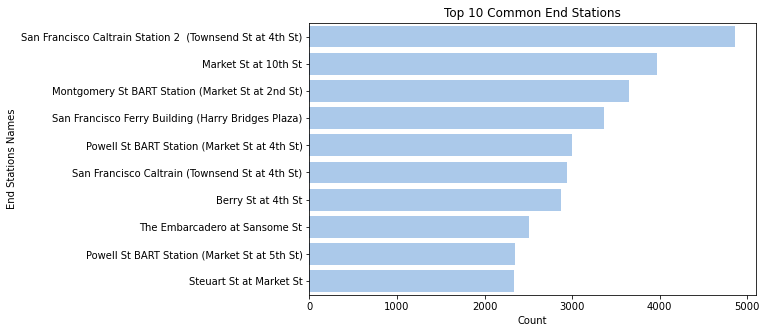

In [80]:
# Displaying the top 10 end stations according to count of bike rides
plt.figure(figsize=(8,5))
sb.barplot(y=list(end_station_10.keys()), x=list(end_station_10.values()), color=color[0])
plt.ylabel('End Stations Names')
plt.xlabel('Count')
plt.title('Top 10 Common End Stations')
plt.show()

>**I alos displayed the top 10 end stations according to count of bike rides.**

#### `4` Start Time

**I will generate a start date and a start day columns.**

In [81]:
# Create a date(year-mon-day) column of start time
start_date = df2.start_time.str.split(" ", n = 1, expand = True)
df2['start_date'] = start_date[0]

In [82]:
# Create a day name column of start time
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
day = []
for i in df2.start_date:
    day.append(day_name[datetime.datetime.strptime(i, '%Y-%m-%d').weekday()])

df2['start_day'] = day 

In [83]:
# printing the highest and lowest dates
print(df2.start_date.nunique())
print(df2.start_date.max())
print(df2.start_date.min())

28
2019-02-28
2019-02-01


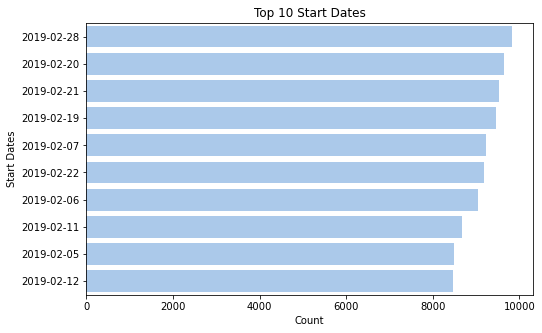

In [84]:
# Displaying the top 10 start dates according to count of bike rides
start_date_10 = top_count(10, 'start_date')

plt.figure(figsize=(8,5))
sb.barplot(y=list(start_date_10.keys()), x=list(start_date_10.values()), color=color[0])
plt.ylabel('Start Dates')
plt.xlabel('Count')
plt.title('Top 10 Start Dates')
plt.show()

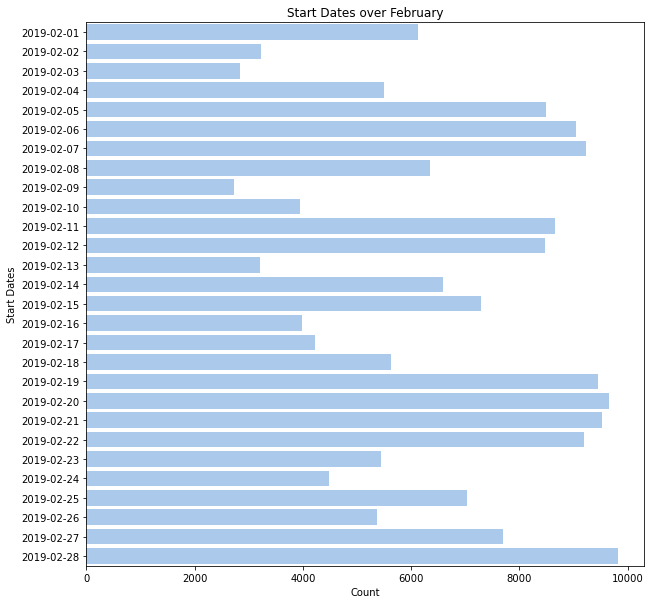

In [85]:
# Displaying the count of bike rides by start dates
start_dates = list(df2.start_date.unique())
start_dates.reverse()

plt.figure(figsize=(10,10))
sb.countplot(data=df2, y='start_date', color=color[0], order=start_dates)
plt.ylabel('Start Dates')
plt.xlabel('Count')
plt.title('Start Dates over February')
plt.show()

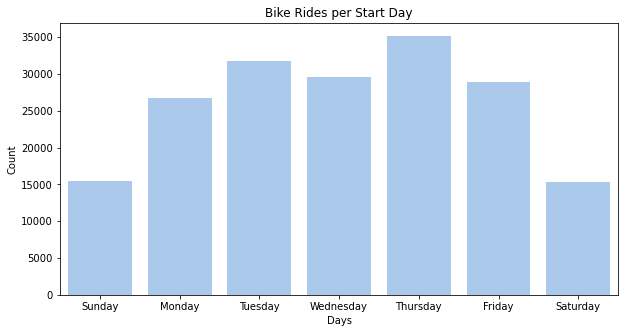

In [86]:
# Displaying the count of bike rides by weekdays names
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10,5))
sb.countplot(data=df2, x='start_day', color=color[0], order=order)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Bike Rides per Start Day')
plt.show()

>**The data is collected over the month of February of 2019.<br>It is clear that bikes are mostly used during workdays (Monday to Friday in USA), so it is a viral transportation for people to get to work.**

#### `5` End Time

In [87]:
# Create a date(year-mon-day) column of end time
end_date = df2.end_time.str.split(" ", n = 1, expand = True)
df2['end_date'] = end_date[0]

In [88]:
# Create a day name column of end time
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
day = []
for i in df2.end_date:
    day.append(day_name[datetime.datetime.strptime(i, '%Y-%m-%d').weekday()])

df2['end_day'] = day 

In [89]:
# printing the highest and lowest of end dates
print(df2.end_date.nunique())
print(df2.end_date.max())
print(df2.end_date.min())

29
2019-03-01
2019-02-01


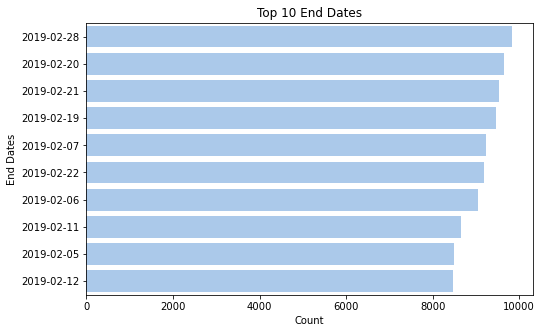

In [90]:
# Displaying the top 10 end dates according to count of bike rides
end_date_10 = top_count(10, 'end_date')

plt.figure(figsize=(8,5))
sb.barplot(y=list(end_date_10.keys()), x=list(end_date_10.values()), color=color[0])
plt.ylabel('End Dates')
plt.xlabel('Count')
plt.title('Top 10 End Dates')
plt.show()

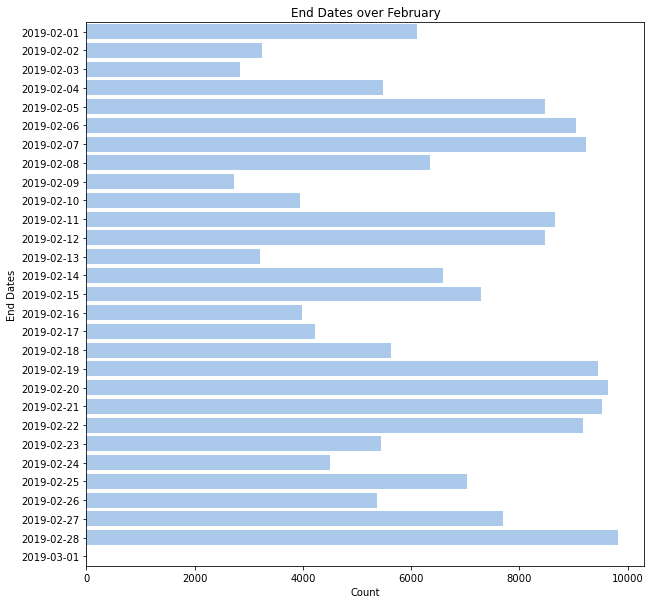

In [91]:
# Displaying the count of bike rides by end dates
end_dates = list(df2.end_date.unique())
end_dates.reverse()

plt.figure(figsize=(10,10))
sb.countplot(data=df2, y='end_date', color=color[0], order=end_dates)
plt.ylabel('End Dates')
plt.xlabel('Count')
plt.title('End Dates over February')
plt.show()

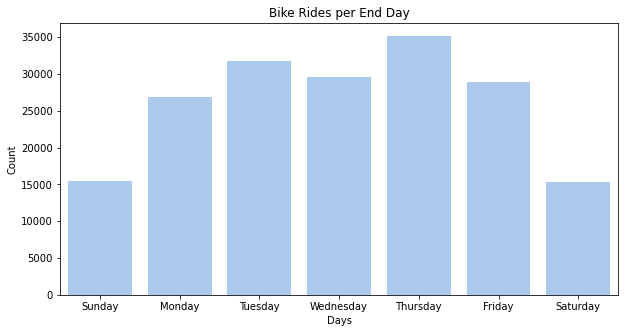

In [92]:
# Displaying the count of bike rides by end weekdays names
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10,5))
sb.countplot(data=df2, x='end_day', color=color[0], order=order)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Bike Rides per End Day')
plt.show()

>**It is very similar to the start time graphs, so we can conclude that most rides start and end at the same day.**

#### `6` Start Hour

In [93]:
# Create an hour column of start time
start_hour = df2.start_time.str.split(" ", n = 1, expand = True)[1].str.split(":", n=1, expand=True)
df2['start_hour'] = start_hour[0]
df2.start_hour = df2.start_hour.astype(int)

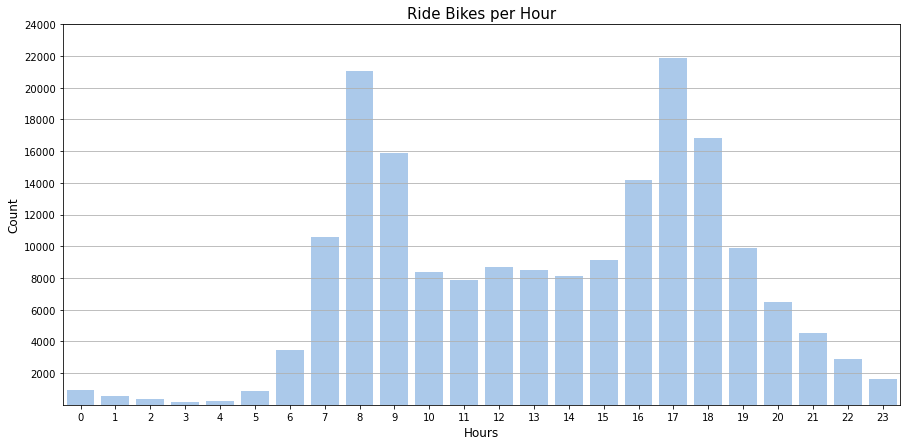

In [94]:
# Displaying the count of bike rides by the hour they started
order = list(range(0,24))
ticks = list(range(2000,25000,2000))
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(15,7))
sb.countplot(data=df2, x='start_hour', color=color[0], order=order)
plt.xlabel('Hours', size=12)
plt.ylabel('Count', size=12)
plt.title('Ride Bikes per Hour', size=15)
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()
plt.show()

> **It is very clear that many people use the service as a transportation to work, since the count of bike rides is very high at 8 a.m. and 5 p.m. which translates to people going to work and and returning back.**

#### `7` End Hour

In [95]:
# Create an hour column of start time
end_hour = df2.end_time.str.split(" ", n = 1, expand = True)[1].str.split(":", n=1, expand=True)
df2['end_hour'] = end_hour[0]
df2.end_hour = df2.end_hour.astype(int)

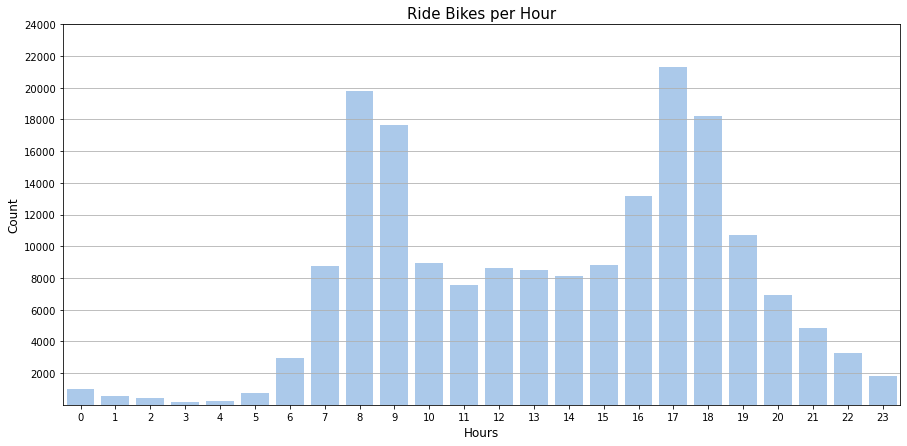

In [96]:
# Displaying the count of bike rides by the hour they ended
order = list(range(0,24))
ticks = list(range(2000,25000,2000))
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(15,7))
sb.countplot(data=df2, x='end_hour', color=color[0], order=order)
plt.xlabel('Hours', size=12)
plt.ylabel('Count', size=12)
plt.title('Ride Bikes per Hour', size=15)
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()
plt.show()

> **Since most rides duration are below 30 minutes, so the graph above is expected because most rides will start and end at the same hour.**

#### `8` Bike ID

In [97]:
# The number of bikes
df2.bike_id.nunique()

4618

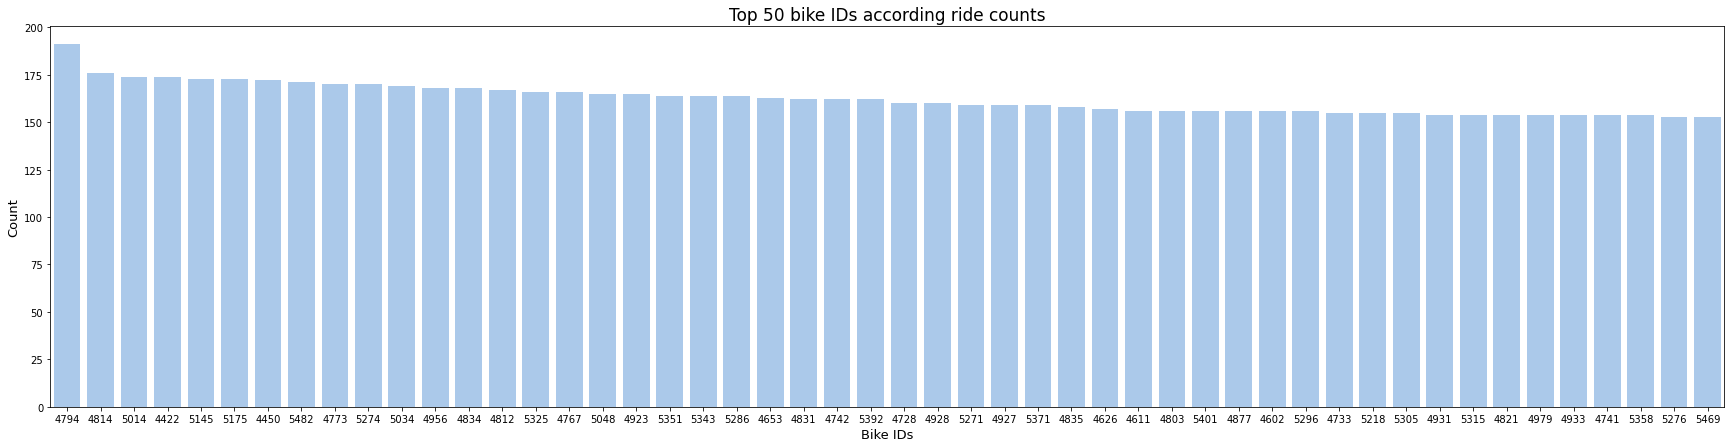

In [98]:
# Displaying the top 50 used bikes according to the count of bike rides
bike_id_50 = top_count(50, 'bike_id')    

plt.figure(figsize=(30,7))
sb.barplot(x=list(bike_id_50.keys()), y=list(bike_id_50.values()), color=color[0], order=df2.bike_id.value_counts().index[:50])
plt.xlabel('Bike IDs', size=13)
plt.ylabel('Count', size=13)
plt.title('Top 50 bike IDs according ride counts', size=17)
plt.show()

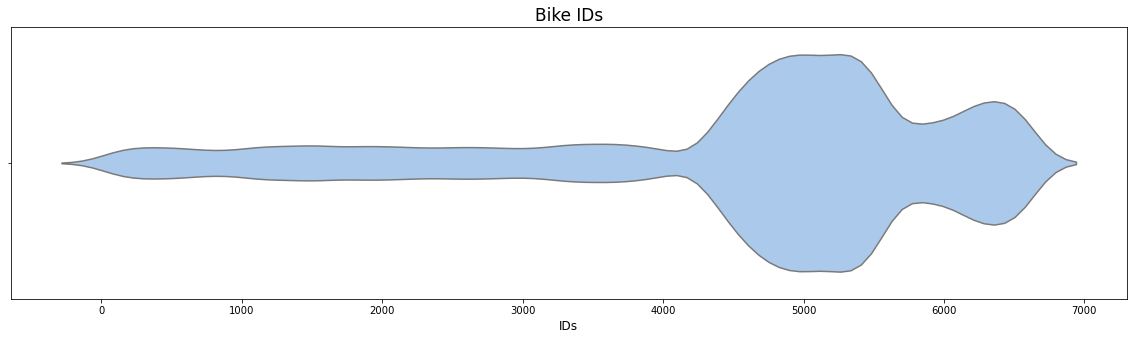

In [99]:
# Displaying the count of bike rides or how much are bikes used by their ids
ticks = list(np.arange(1870, 2004, 10))
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(20,5))
sb.violinplot(data=df2, x='bike_id', palette=color, inner=None)
plt.xlabel('IDs', size=12)
#plt.ylabel('Count')
#plt.xticks(ticks, labels)
plt.title('Bike IDs', size=17)
plt.show()

> **There 4618 different bikes, so I displayed the most used 50 bikes according to bike ride counts.**<br>
>
>**The bikes that have ids ranging from 4200 to 5800 and over 6000 tend to be used more than other bikes. It could be related to certain stations.**


#### `9` User Type

In [100]:
# The number of user types and their value counts
df2.user_type.value_counts()

Subscriber    163414
Customer       19801
Name: user_type, dtype: int64

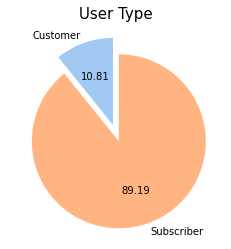

In [101]:
# Displaying the percentage of each user type 
explode = [0.1, 0.1]
df2.groupby('user_type').size().plot(kind='pie', autopct='%.2f', startangle = 90, explode=explode, colors=[color[0], color[1]])
plt.ylabel('')
plt.title('User Type', size=15)
plt.show()

>**It is obvious that nearly 90% of the users have a subscribtion.**

#### `10` Member Gender

In [102]:
# The number of gender types and their value counts 
df2.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

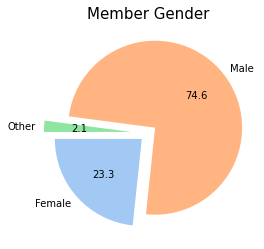

In [103]:
# Displaying the percentage of each gender
explode = [0.1, 0.1, 0.2]
df2.groupby('member_gender').size().plot(kind='pie', autopct='%.1f', startangle = 180, explode=explode, colors=[color[0], color[1], color[2]])
plt.ylabel('')
plt.title('Member Gender', size=15)
plt.show()

> **Males are nearly 75% of the people using the service, but females are only 23.3%.**

#### `11` Member Birth Year

In [104]:
# The number of unique birth years
df2.member_birth_year.nunique()

75

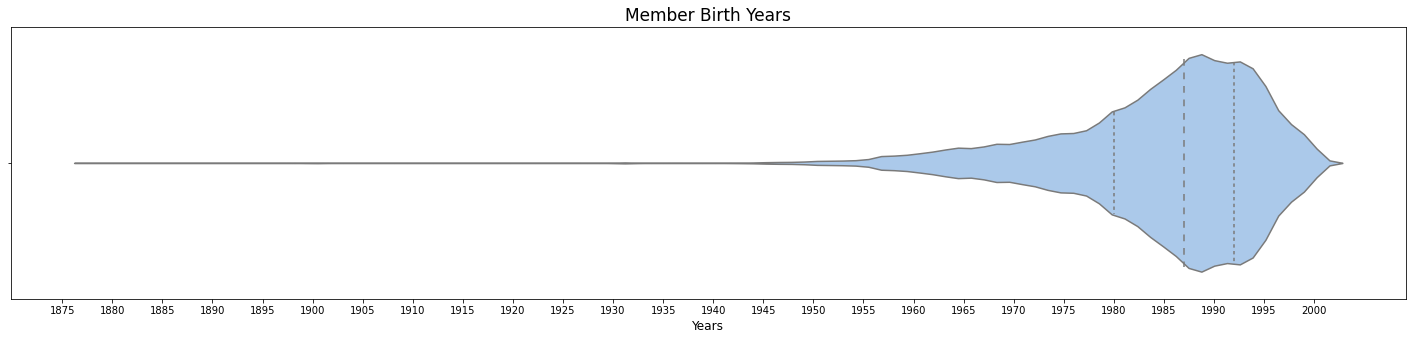

In [105]:
# Displaying the distrubution and range of users birth years 
ticks = list(np.arange(1875, 2004, 5))
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(25,5))
sb.violinplot(data=df2, x='member_birth_year', palette=color, inner='quartile')
plt.xlabel('Years', size=12)
plt.xticks(ticks, labels)
plt.title('Member Birth Years', size=17)
plt.show()

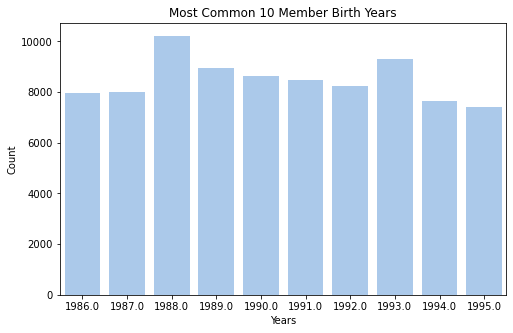

In [106]:
# Displaying the most common 10 birth years of users
birth_year_10 = top_count(10, 'member_birth_year')

plt.figure(figsize=(8,5))
sb.barplot(x=list(birth_year_10.keys()), y=list(birth_year_10.values()), color=color[0])
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Most Common 10 Member Birth Years')
plt.show()

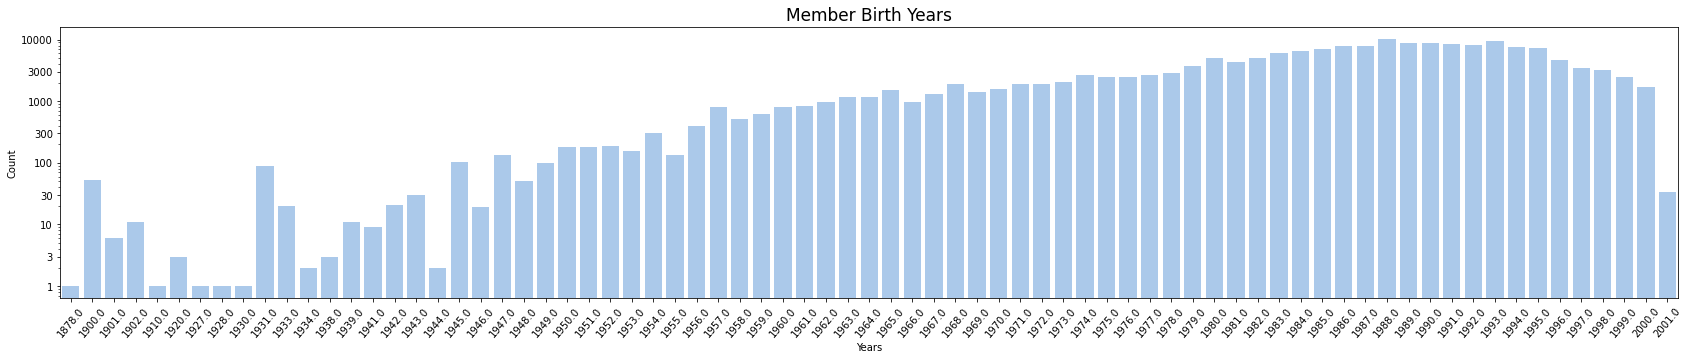

In [107]:
# Displaying the distrubution and range of users birth years 
ticks = [1,3, 10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(29,5))
sb.countplot(data=df2, x='member_birth_year', color=color[0])
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.title('Member Birth Years', size=17)
plt.yscale('log')

# Apply x-ticks
plt.yticks(ticks, labels)
plt.show()

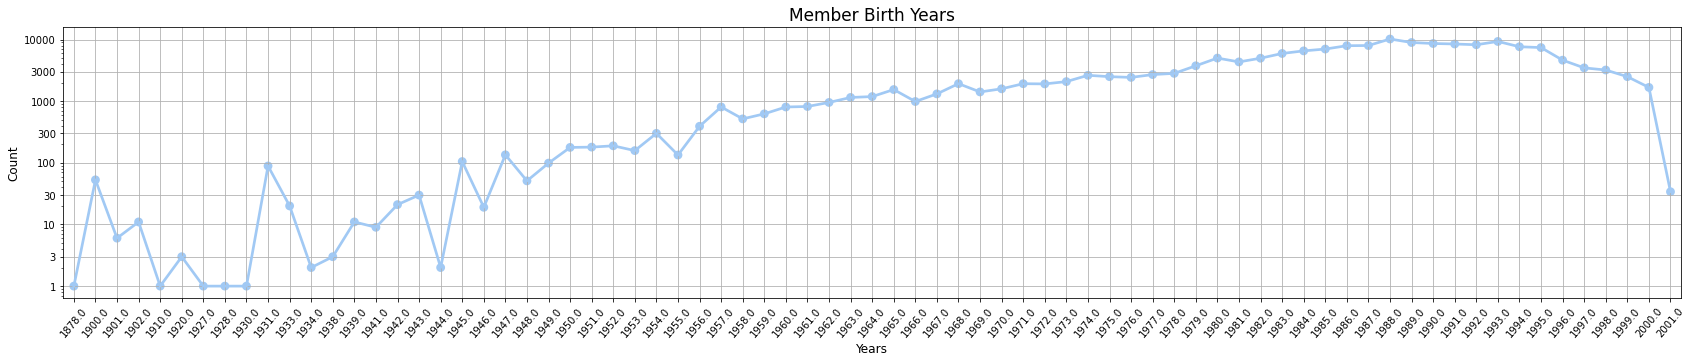

In [108]:
# Displaying the distrubution and range of users birth years 
ticks = [1,3, 10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(29,5))
sb.pointplot(x=df2.member_birth_year.value_counts().index, y=df2.member_birth_year.value_counts().values, color=color[0])
plt.xlabel('Years', size=12)
plt.ylabel('Count', size=12)
plt.title('Member Birth Years', size=17)
plt.yscale('log')
plt.xticks(rotation=50)
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()

plt.show()

> **Most users are born after 1960 and only few are born before.<br>So by the time the data was collected most user's ages ranged between 19 and 59.**

#### `12` Bike Share for all Trip

In [110]:
# The number of users who are enrolled in bike share for all program and who are not
df2.bike_share_for_all_trip.value_counts()

No     165869
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

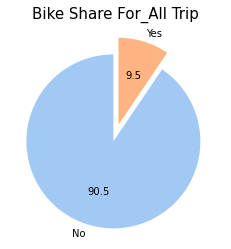

In [111]:
# The percentage of users who are enrolled in bike share for all program and who are not
explode = [0.1, 0.1]
df2.groupby('bike_share_for_all_trip').size().plot(kind='pie', autopct='%.1f', startangle = 90, explode=explode, colors=color)
plt.ylabel('')
plt.title('Bike Share For_All Trip', size=15)
plt.show()

> **90% of the members are not enrolled in the Bike Share for All program for low-income residents.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The ride duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked right skewed and most trip durations were below 30 minutes.<br>
>
>The number of stations was very large that I didn't expect.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I generated 3 new columns (start date, start day, start hour) using the start time to help me investigate the data.
>
>I did the same using the end time column.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the data.

In [58]:
df2.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hour,start_date,start_day,end_date,end_day,start_hour,end_hour
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.75,14.50,2019-02-28,Thursday,2019-03-01,Friday,17,8
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.68,11.81,2019-02-28,Thursday,2019-03-01,Friday,18,6


#### Same Start & End Station

In [112]:
# Creating a new column contaning the station name if the ride started and ended on the same station, otherwise null
same_start_end_station = []
for i in range(df2.shape[0]):
    if df2.loc[i, 'start_station_id'] == df2.loc[i, 'end_station_id']:
        same_start_end_station.append(df2.loc[i, 'start_station_name'])
    
    else:
        same_start_end_station.append(np.nan)

df2['same_start_end_station'] = same_start_end_station

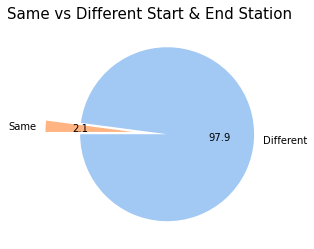

In [113]:
# Displaying the percentage between rides that started and ended on the same station and the rides that did not
percentage = [df2.same_start_end_station.isna().sum(), df2.shape[0]-df2.same_start_end_station.isna().sum()]
explode = [0.2, 0.2]
plt.pie(x=percentage, autopct='%.1f', startangle = 180, explode=explode, colors=color, labels=['Different', 'Same'])
plt.title('Same vs Different Start & End Station', size=15)
plt.show()

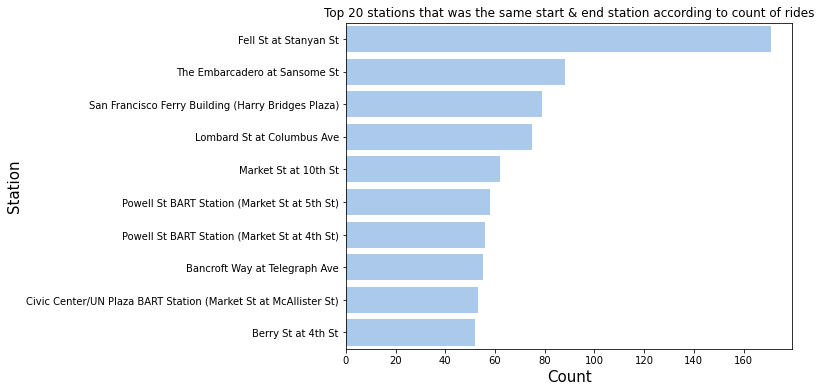

In [114]:
# Displaying the count of bike rides that started and ended on the same station
start_end_station_10 = top_count(10, 'same_start_end_station')

plt.figure(figsize=(8,6))
sb.barplot(y=list(start_end_station_10.keys()), x=list(start_end_station_10.values()), color=color[0])
plt.xlabel('Count', size=15)
plt.ylabel('Station', size=15)
plt.title('Top 20 stations that was the same start & end station according to count of rides')
plt.show()

> **Nearly 98% of bike rides start and end at different stations.**<br>
> **Fell St at Stanyan St has the highest number of rides starting and ending at it.**

#### User Type & Member Gender

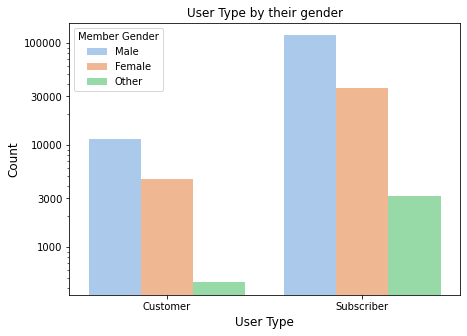

In [115]:
# The user types hued by users gender
ticks = [1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(7,5))
sb.countplot(data=df2, x='user_type', hue='member_gender',palette=color, hue_order=['Male', 'Female', 'Other'])
plt.title('User Type by their gender')
plt.xlabel('User Type', size=12)
plt.ylabel('Count', size=12)
plt.legend(title='Member Gender')
plt.yscale('log')

# Apply x-ticks
plt.yticks(ticks, labels)
plt.show()

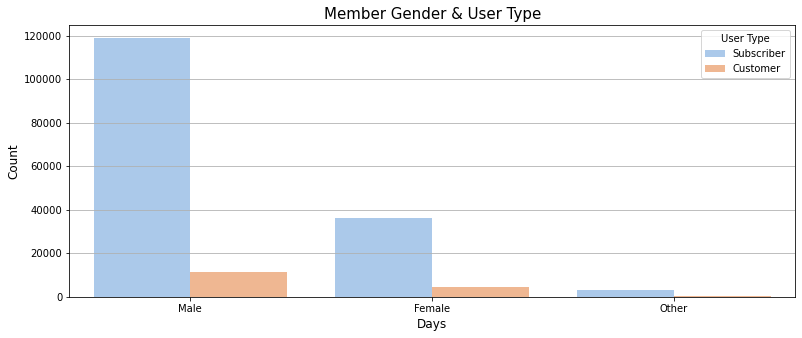

In [116]:
# The user genders hued by their types 
plt.figure(figsize=(13,5))
order = ['Male', 'Female', 'Other']
sb.countplot(data=df2, x='member_gender', order=order, hue='user_type', palette=color, hue_order=['Subscriber', 'Customer'])
plt.legend(title='User Type')
plt.xlabel('Days', size=12)
plt.ylabel('Count', size=12)
plt.title('Member Gender & User Type', size=15)
plt.gca().yaxis.grid()
plt.show()

> **Most users are males whether they have a subscribtion or not.**

#### Data Categorized by User Type  

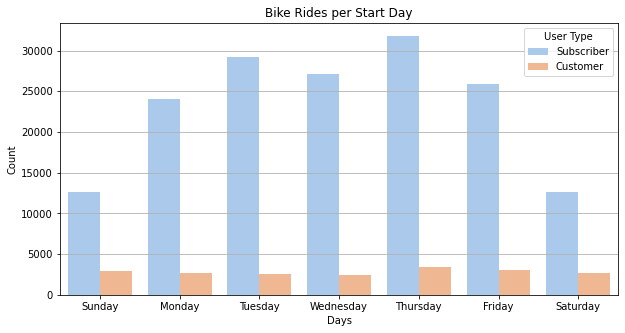

In [117]:
# Count of bike rides by bike ride start weekdays and hued by user types
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10,5))
sb.countplot(data=df2, x='start_day', hue='user_type', order=order, palette=color, hue_order=['Subscriber', 'Customer'])
plt.legend(title='User Type')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Bike Rides per Start Day')
plt.gca().yaxis.grid()
plt.show()

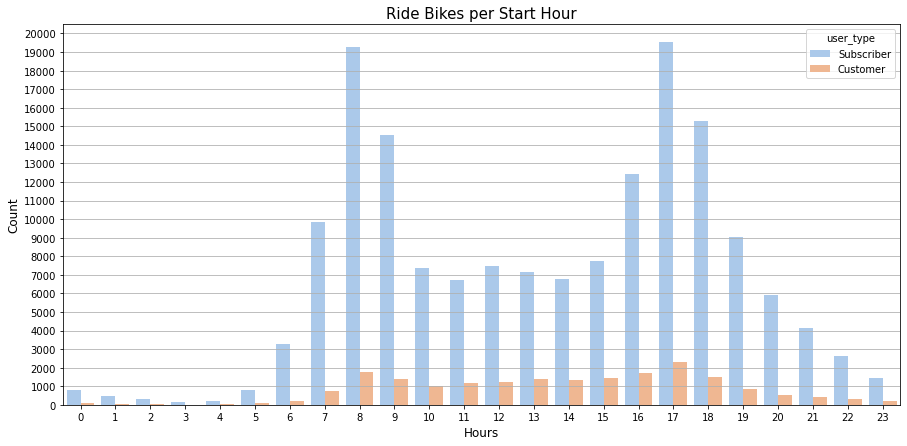

In [118]:
# Count of bike rides by bike ride start hours and hued by user types
order = list(range(0,24))
ticks = list(range(0,21000,1000))
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(15,7))
sb.countplot(data=df2, x='start_hour', hue='user_type', palette=color, order=order, hue_order=['Subscriber', 'Customer'])
plt.xlabel('Hours', size=12)
plt.ylabel('Count', size=12)
plt.title('Ride Bikes per Start Hour', size=15)
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()
plt.show()

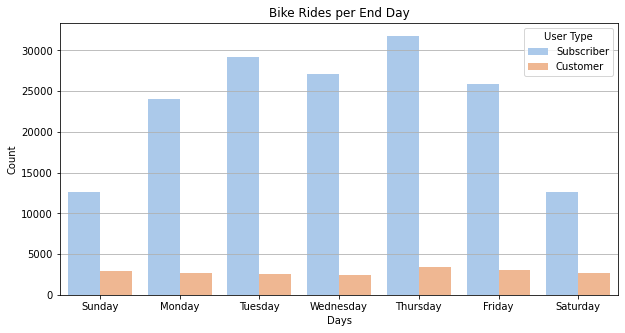

In [119]:
# Count of bike rides by bike ride end weekdays and hued by user types
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10,5))
sb.countplot(data=df2, x='end_day', hue='user_type', order=order, palette=color, hue_order=['Subscriber', 'Customer'])
plt.legend(title='User Type')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Bike Rides per End Day')
plt.gca().yaxis.grid()
plt.show()

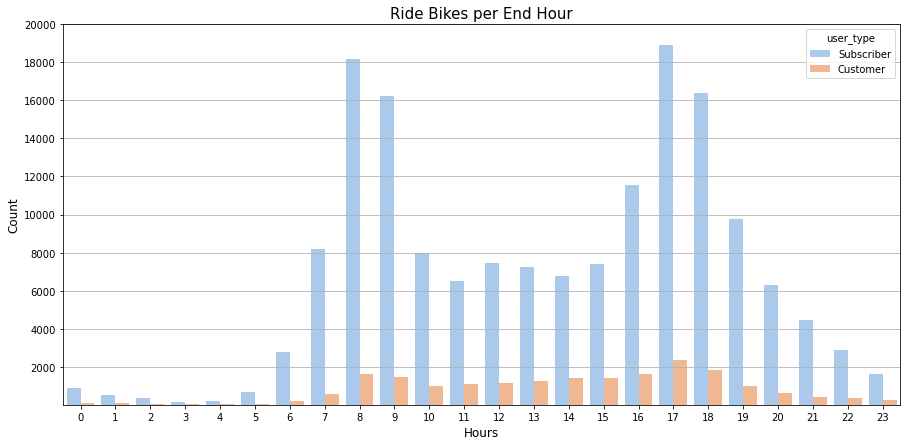

In [120]:
# Count of bike rides by bike ride end hours and hued by user types
order = list(range(0,24))
ticks = list(range(2000,21000,2000))
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(15,7))
sb.countplot(data=df2, x='end_hour', hue='user_type', palette=color, order=order, hue_order=['Subscriber', 'Customer'])
plt.xlabel('Hours', size=12)
plt.ylabel('Count', size=12)
plt.title('Ride Bikes per End Hour', size=15)
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()
plt.show()

> **Users who have a subscribtion make so many more bike rides than regular customers no matter what is the day or the hour.**

#### Ride Bikes that started and ended on different days
*I generated two columns (one_day_trip, two_day_trip) that contains the day.*<br>
- one_day_trip: contains the day name if the ride started and ended on the same day, otherwise null.

- two_day_trip: contains the start day/end day if the ride started and ended on different days, otherwise null.

In [121]:
# Generating a one day trip column that contains weekdays of bike rides that started end ende on the same day, otherwise null 
one_day_trip = []
for i in range(df2.shape[0]):
    if df2.loc[i, 'start_day'] == df2.loc[i, 'end_day']:
        one_day_trip.append(df2.loc[i, 'start_day'])
    
    else:
        one_day_trip.append(np.nan)

df2['one_day_trip'] = one_day_trip

In [122]:
# Generating a two day trip column that contains start and end weekdays of bike rides that started end ende on different days, otherwise null
two_day_trip = []
for i in range(df2.shape[0]):
    if df2.loc[i, 'start_day'] == df2.loc[i, 'end_day']:
        two_day_trip.append(np.nan)
    
    else:
        two_day_trip.append(df2.loc[i, 'start_day']+'/'+df2.loc[i, 'end_day'])

df2['two_day_trip'] = two_day_trip

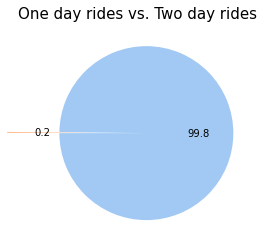

In [123]:
# Displaying the percentage between one day rides and two day rides
no_one_day_rides = df2.shape[0] - df2.one_day_trip.isna().sum()
no_two_day_rides = df2.shape[0] - df2.two_day_trip.isna().sum()
explode = [0.1, 0.5]

plt.pie([no_one_day_rides, no_two_day_rides], autopct='%.1f', startangle = 180, explode=explode, colors=color)
plt.ylabel('')
plt.title('One day rides vs. Two day rides', size=15)
plt.show()

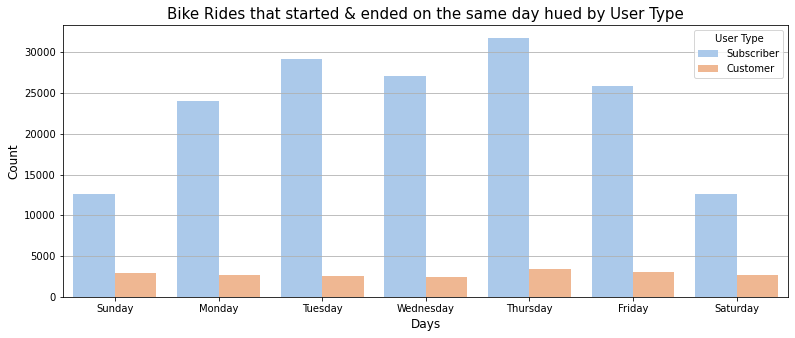

In [127]:
# Count of bike rides by one day bike ride and hued by user types
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(13,5))
sb.countplot(data=df2, x='one_day_trip', hue='user_type', order=order, palette=color, hue_order=['Subscriber', 'Customer'])
plt.legend(title='User Type')
plt.xlabel('Days', size=12)
plt.ylabel('Count', size=12)
plt.title('Bike Rides that started & ended on the same day hued by User Type', size=15)
plt.gca().yaxis.grid()
plt.show()

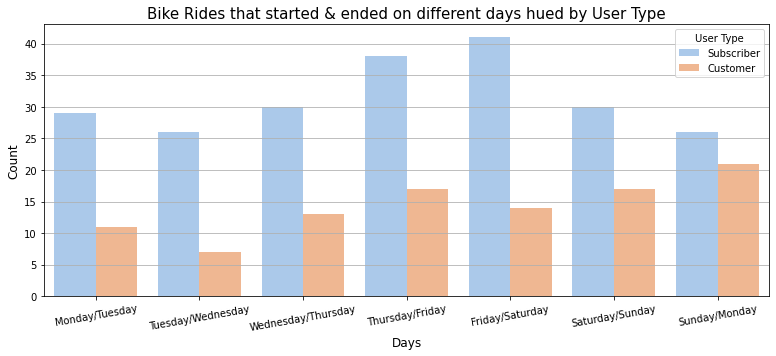

In [128]:
# Count of bike rides by two day bike ride and hued by user types
order =  ['Monday/Tuesday', 'Tuesday/Wednesday', 'Wednesday/Thursday', 'Thursday/Friday', 'Friday/Saturday', 'Saturday/Sunday', 'Sunday/Monday']
plt.figure(figsize=(13,5))
sb.countplot(data=df2, x='two_day_trip', order=order, hue='user_type', palette=color, hue_order=['Subscriber', 'Customer'])
plt.legend(title='User Type')
plt.xlabel('Days', size=12)
plt.ylabel('Count', size=12)
plt.title('Bike Rides that started & ended on different days hued by User Type', size=15)
plt.xticks(rotation=10)
plt.gca().yaxis.grid()
plt.show()

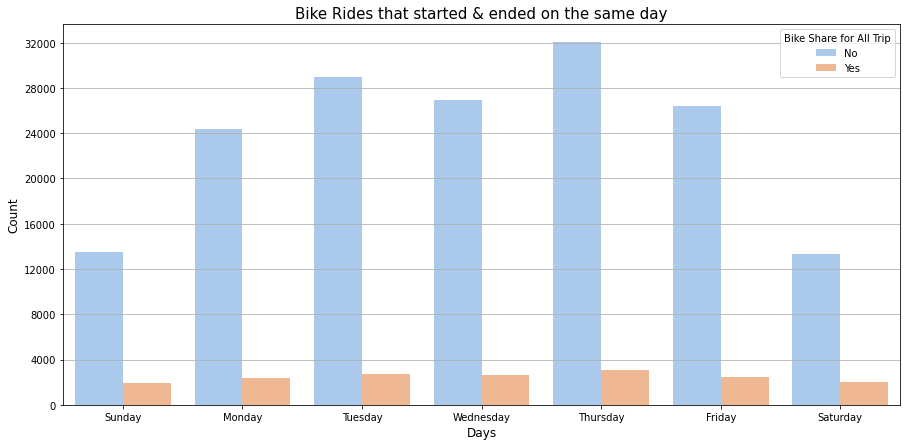

In [129]:
# Count of bike rides that started & ended on the same day hued by user types
ticks = np.arange(0,35000,4000)
labels = ['{}'.format(v) for v in ticks]
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(15,7))
sb.countplot(data=df2, x='one_day_trip', hue='bike_share_for_all_trip', palette=color, order=order)
plt.xlabel('Days', size=12)
plt.ylabel('Count', size=12)
plt.title('Bike Rides that started & ended on the same day', size=15)
plt.yticks(ticks, labels)
plt.legend(title='Bike Share for All Trip')
plt.gca().yaxis.grid()
plt.show()

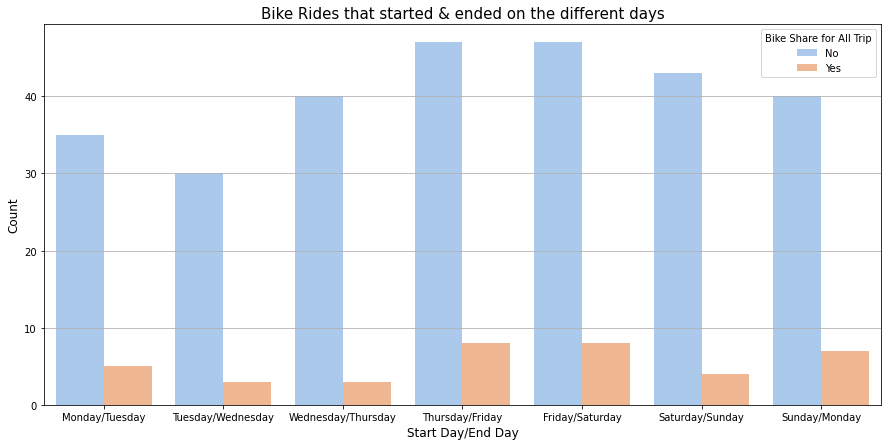

In [130]:
# Count of bike rides that started & ended on different days hued by user types
order =  ['Monday/Tuesday', 'Tuesday/Wednesday', 'Wednesday/Thursday', 'Thursday/Friday', 'Friday/Saturday', 'Saturday/Sunday', 'Sunday/Monday']

plt.figure(figsize=(15,7))
sb.countplot(data=df2, x='two_day_trip', hue='bike_share_for_all_trip', palette=color, order=order)
plt.xlabel('Start Day/End Day', size=12)
plt.ylabel('Count', size=12)
plt.title('Bike Rides that started & ended on the different days', size=15)
plt.legend(title='Bike Share for All Trip')
plt.gca().yaxis.grid()
plt.show()

> - **Nearly all the rides started and ended on the same day except for 0.2% of the rides started and ended on different days.**
>
> - **I think the of number two day rides that started on Friday and ended on Saturday is the highest beacuase it is the the start of weekend.**
>
> - **The difference between count of subscriber and customer users is noticeably less in two day rides than in one day rides.**

#### Member birth years

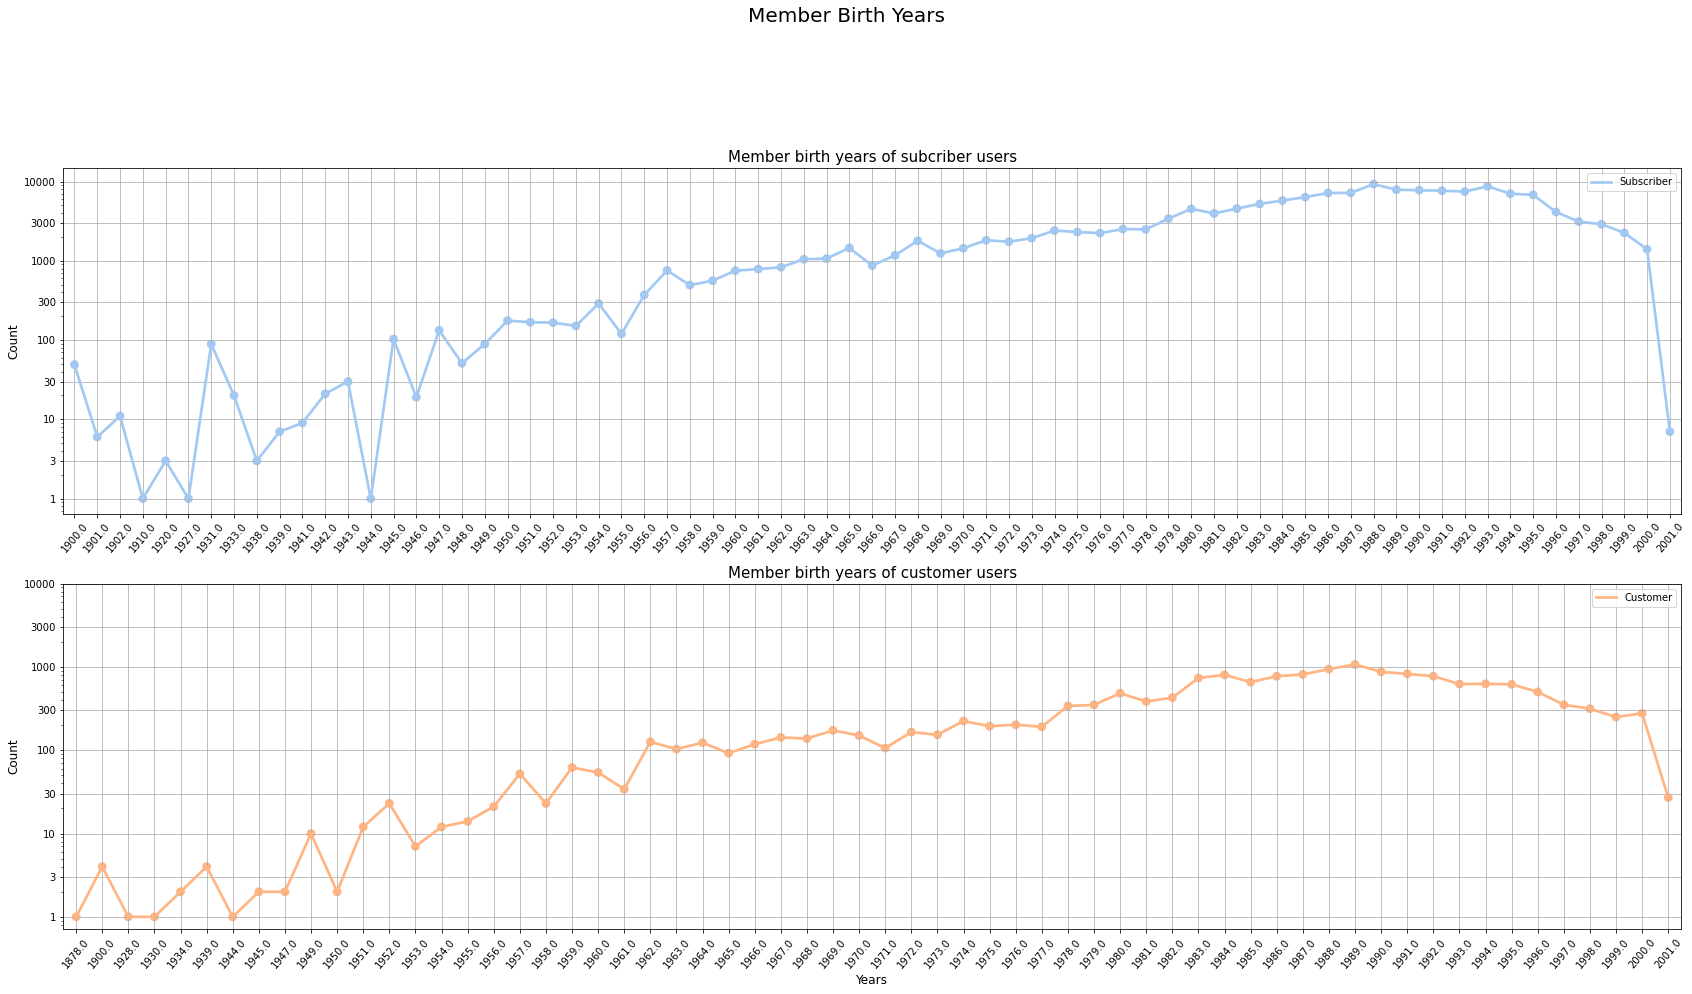

In [137]:
# Count of bike users by their birth year and whether they are customers or subscribers using a point plot
ticks = [1,3, 10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]

x_customer   = df2.groupby('user_type')['member_birth_year'].value_counts().Customer.index
y_customer   = df2.groupby('user_type')['member_birth_year'].value_counts().Customer.values
x_subscriber = df2.groupby('user_type')['member_birth_year'].value_counts().Subscriber.index
y_subscriber = df2.groupby('user_type')['member_birth_year'].value_counts().Subscriber.values

plt.figure(figsize=(29,14))
plt.legend(labels=['Customer', 'Subscriber'])
plt.suptitle('Member Birth Years', y=1.04, size=20)

plt.subplot(211)
sb.pointplot(x=x_subscriber, y=y_subscriber, color=color[0])
plt.title('Member birth years of subcriber users', size=15)
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
plt.xlabel('', size=12)
plt.ylabel('Count', size=12)
plt.yscale('log')
plt.xticks(rotation=50)
plt.yticks(ticks, labels)
plt.legend(labels=['Subscriber'])

plt.subplot(212)
sb.pointplot(x=x_customer, y=y_customer, color=color[1])
plt.title('Member birth years of customer users', size=15)
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
plt.xlabel('Years', size=12)
plt.ylabel('Count', size=12)
plt.yscale('log')
plt.xticks(rotation=50)
plt.yticks(ticks, labels)
plt.legend(labels=['Customer'])

plt.show()

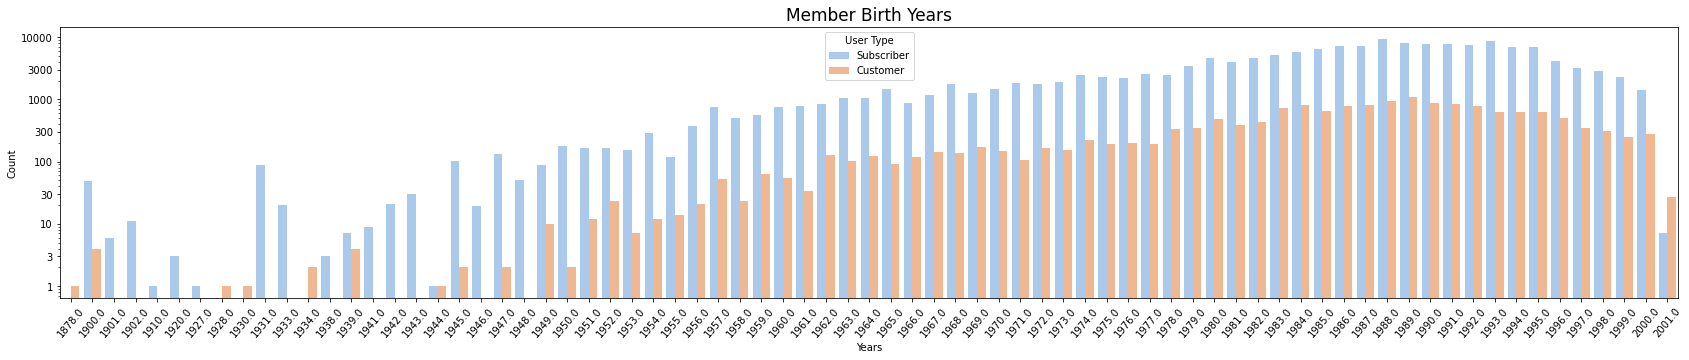

In [138]:
# Count of bike users by their birth year and whether they are customers or subscribers using a clustered bar chart
ticks = [1,3, 10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(29,5))
sb.countplot(data=df2, x='member_birth_year', hue='user_type', palette=color,  hue_order=['Subscriber', 'Customer'])
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.title('Member Birth Years', size=17)
plt.yscale('log')
plt.legend(title='User Type')
# Apply x-ticks
plt.yticks(ticks, labels)
plt.show()

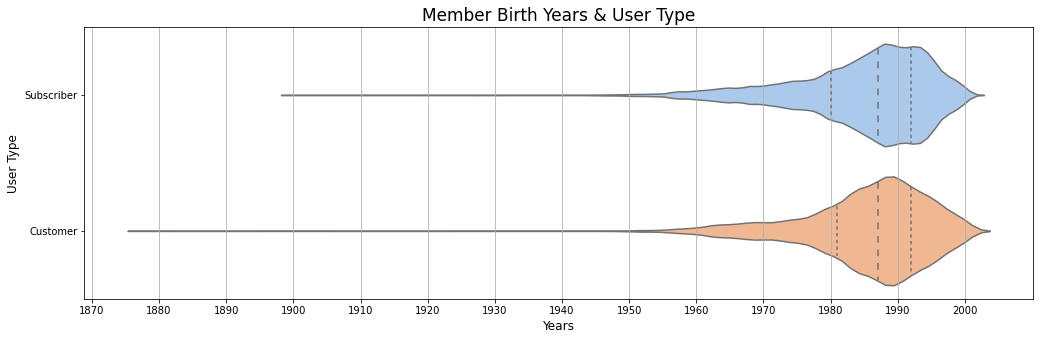

In [139]:
# Count of bike users by their birth year and whether they are customers or subscribers using a violin plot
ticks = list(np.arange(1870, 2004, 10))
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(17,5))
sb.violinplot(data=df2, x='member_birth_year', y='user_type', palette=color, inner='quartile',  order=['Subscriber', 'Customer'])
plt.xlabel('Years', size=12)
plt.ylabel('User Type', size=12)
plt.xticks(ticks, labels)
plt.title('Member Birth Years & User Type', size=17)
plt.gca().xaxis.grid()
plt.show()

> **The number of older people born before 1949 who are customers and don't have a subscribtion is very low ,but it increases with younger people.**

#### Data Categorized by Member Gender

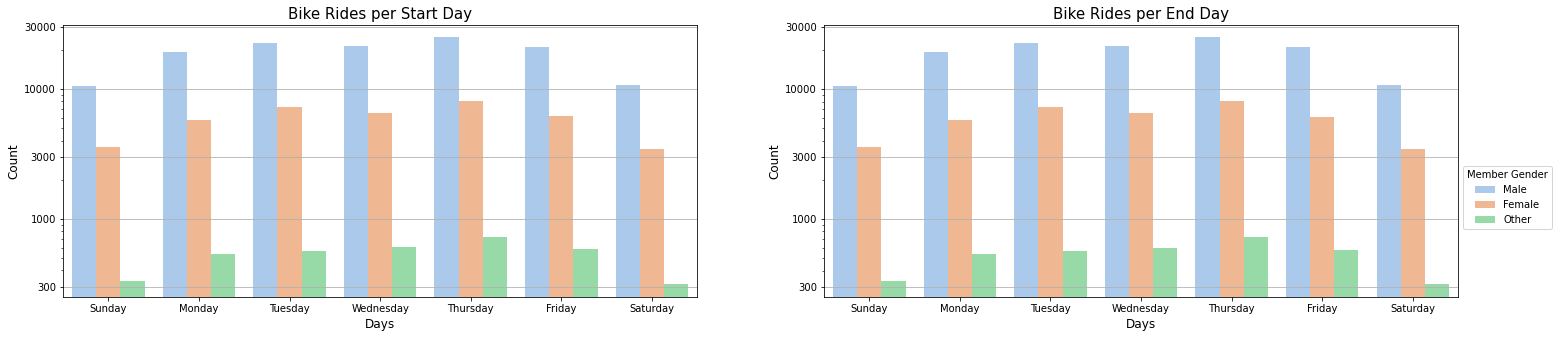

In [140]:
# Count of bike rides start & end weekdays and hued by user gender
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ticks = [300, 1000, 3000, 10000, 30000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(25,5))

plt.subplot(121)
sb.countplot(data=df2, x='start_day', hue='member_gender', order=order, palette=color, hue_order=['Male', 'Female', 'Other'])
plt.legend().set_visible(False)
plt.xlabel('Days', size=12)
plt.ylabel('Count', size=12)
plt.title('Bike Rides per Start Day', size=15)
plt.yscale('log')
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()


plt.subplot(122)
sb.countplot(data=df2, x='end_day', hue='member_gender', order=order, palette=color, hue_order=['Male', 'Female', 'Other'])
plt.legend(title='Member Gender', bbox_to_anchor=(1, 0.5))
plt.xlabel('Days', size=12)
plt.ylabel('Count', size=12)
plt.title('Bike Rides per End Day', size=15)
plt.yscale('log')
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()
plt.show()

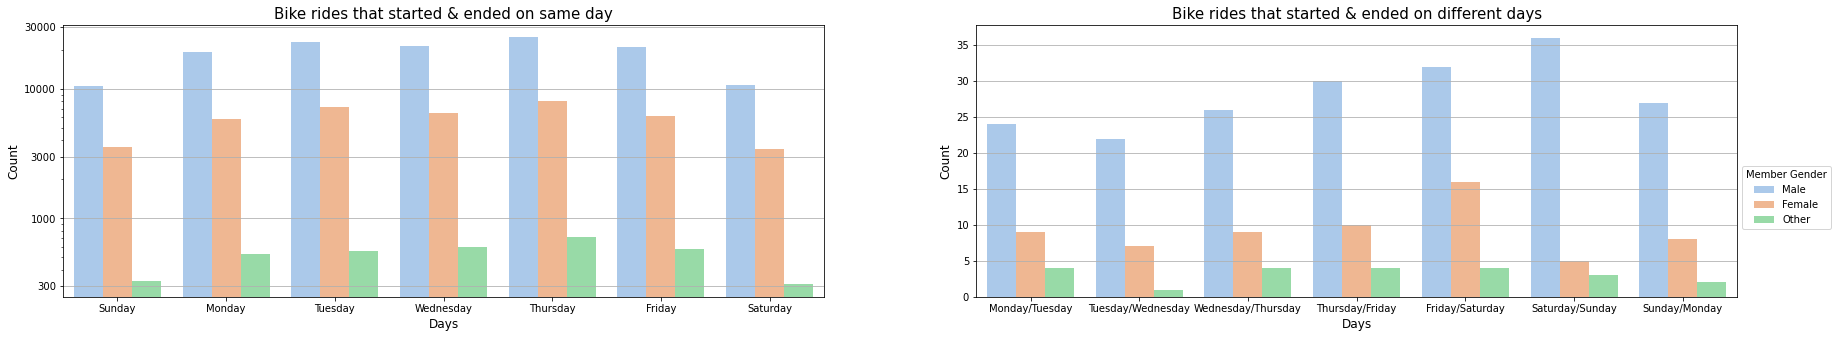

In [141]:
# Count of bike rides whether its one day ride or two day ride and hued by user gender
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ticks = [300, 1000, 3000, 10000, 30000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(30,5))

plt.subplot(121)
sb.countplot(data=df2, x='one_day_trip', hue='member_gender', order=order, palette=color, hue_order=['Male', 'Female', 'Other'])
plt.legend().set_visible(False)
plt.xlabel('Days', size=12)
plt.ylabel('Count', size=12)
plt.title('Bike rides that started & ended on same day', size=15)
plt.yscale('log')
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()

order =  ['Monday/Tuesday', 'Tuesday/Wednesday', 'Wednesday/Thursday', 'Thursday/Friday', 'Friday/Saturday', 'Saturday/Sunday', 'Sunday/Monday']

plt.subplot(122)
sb.countplot(data=df2, x='two_day_trip', hue='member_gender', order=order, palette=color, hue_order=['Male', 'Female', 'Other'])
plt.legend(title='Member Gender', bbox_to_anchor=(1, 0.5))
plt.xlabel('Days', size=12)
plt.ylabel('Count', size=12)
plt.title('Bike rides that started & ended on different days', size=15)
plt.gca().yaxis.grid()
plt.show()

> **Male users make many bike rides starting on Saturday and ending on Sunday compared to female users.**<br>
>
> **No matter what is the day or hour males make more bike rides than any gender.**

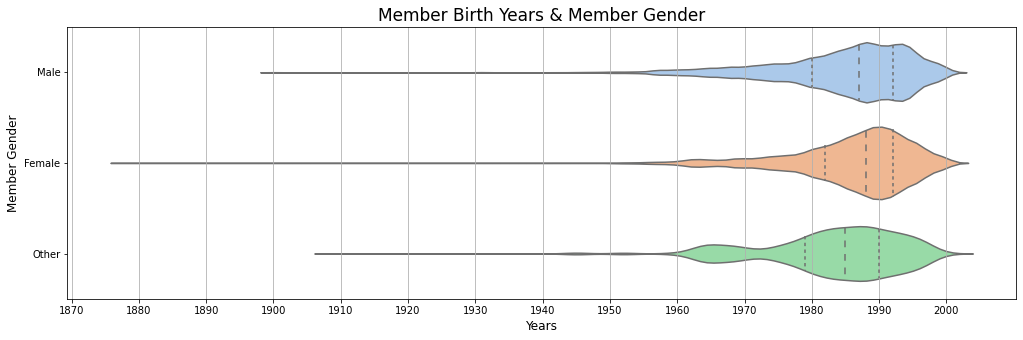

In [142]:
# Count of bike users by their birth year and hued by their gender using a violin plot
ticks = list(np.arange(1870, 2004, 10))
labels = ['{}'.format(v) for v in ticks]
order = ['Male', 'Female', 'Other']

plt.figure(figsize=(17,5))
sb.violinplot(data=df2, x='member_birth_year', y='member_gender', palette=color, order=order, inner='quartile')
plt.xlabel('Years', size=12)
plt.ylabel('Member Gender', size=12)
plt.xticks(ticks, labels)
plt.title('Member Birth Years & Member Gender', size=17)
plt.gca().xaxis.grid()
plt.show()

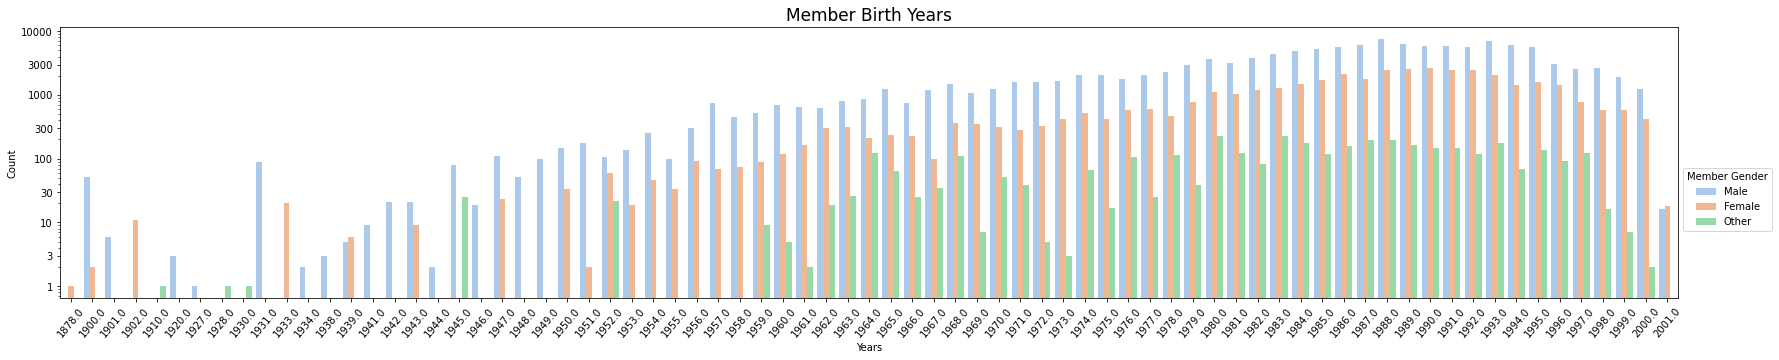

In [143]:
# Count of bike users by their birth year and hued by their gender using a clustered bar chart
ticks = [1,3, 10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(29,5))
sb.countplot(data=df2, x='member_birth_year', hue='member_gender', palette=color, hue_order=['Male', 'Female', 'Other'])
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.title('Member Birth Years', size=17)
plt.legend(title='Member Gender', bbox_to_anchor=(1, 0.5))
plt.yscale('log')

# Apply x-ticks
plt.yticks(ticks, labels)
plt.show()

> **The oldest user of the system is a female.**
>
>**Number of males categorized by birth years are more then any other gender.**

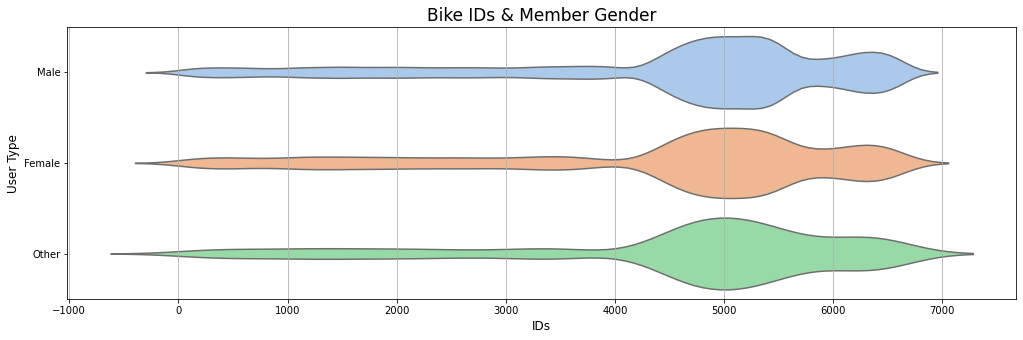

In [171]:
# Count of bike rides by the bike id and hued by user genders using a violin plot
order = ['Male', 'Female', 'Other']
plt.figure(figsize=(17,5))
sb.violinplot(data=df2, x='bike_id', y='member_gender', order=order, palette=color, inner=None)
plt.xlabel('IDs', size=12)
plt.ylabel('User Type', size=12)
plt.title('Bike IDs & Member Gender', size=17)
plt.gca().xaxis.grid()
plt.show()

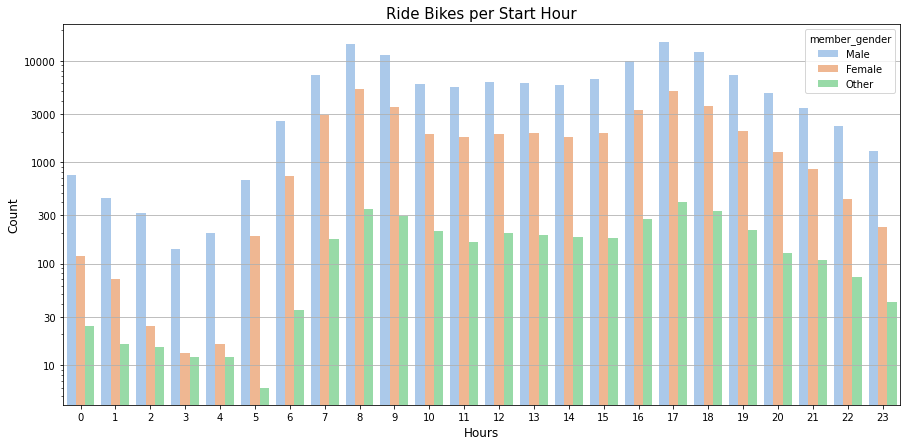

In [145]:
# Count of bike rides by the ride start hour and hued by user genders
order = list(range(0,24))
ticks = [10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
hue_order = ['Male', 'Female', 'Other']

plt.figure(figsize=(15,7))
sb.countplot(data=df2, x='start_hour', hue='member_gender', palette=color, order=order, hue_order=hue_order)
plt.xlabel('Hours', size=12)
plt.ylabel('Count', size=12)
plt.title('Ride Bikes per Start Hour', size=15)
plt.yscale('log')
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()
plt.show()

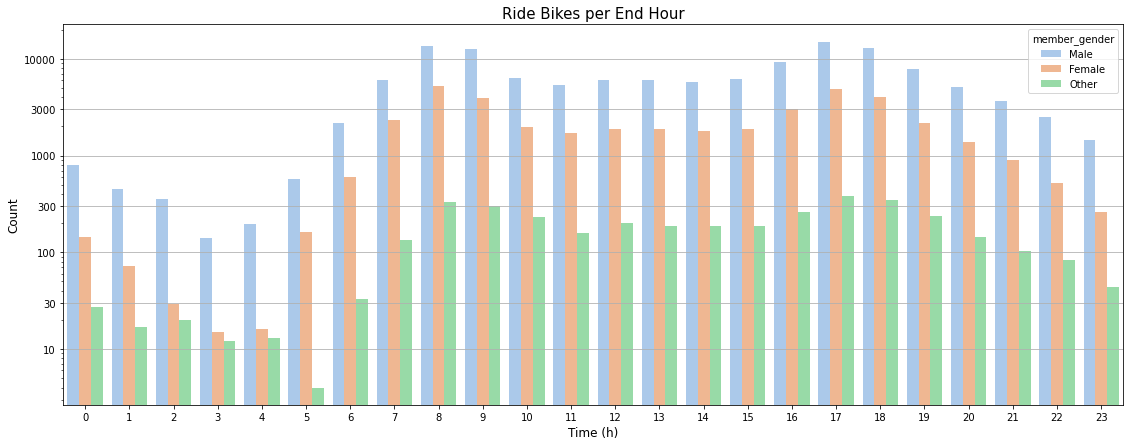

In [146]:
# Count of bike rides by the ride end hour and hued by user genders
order = list(range(0,24))
ticks = [10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
hue_order = ['Male', 'Female', 'Other']

plt.figure(figsize=(19,7))
sb.countplot(data=df2, x='end_hour', hue='member_gender', palette=color, order=order, hue_order=hue_order)
plt.xlabel('Time (h)', size=12)
plt.ylabel('Count', size=12)
plt.title('Ride Bikes per End Hour', size=15)
plt.yscale('log')
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()
plt.show()

> **The number of bike rides for all genders is almost consistent on work hours from 7 a.m. till 5 or 6 p.m.**

#### Bike Share for all trip

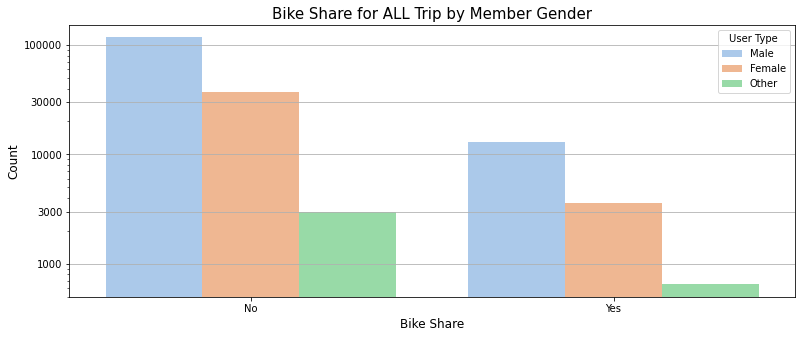

In [147]:
# Count of bike rides categorized by whether the users are enrolled for bike share foe all program or not and hued by user genders
ticks = [1000,3000,10000,30000, 100000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(13,5))
sb.countplot(data=df2, x='bike_share_for_all_trip', hue='member_gender', palette=color, hue_order=['Male', 'Female', 'Other'])
plt.legend(title='User Type')
plt.xlabel('Bike Share', size=12)
plt.ylabel('Count', size=12)
plt.title('Bike Share for ALL Trip by Member Gender', size=15)
plt.gca().yaxis.grid()
plt.yscale('log')
plt.yticks(ticks, labels)
plt.show()

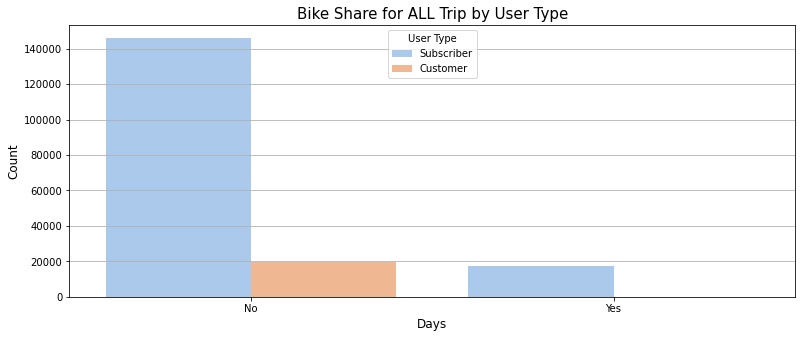

In [148]:
# Count of bike rides categorized by whether the users are enrolled for bike share foe all program or not and hued by user types
plt.figure(figsize=(13,5))
order = ['Male', 'Female', 'Other']
sb.countplot(data=df2, x='bike_share_for_all_trip', hue='user_type', palette=color, hue_order=['Subscriber', 'Customer'])
plt.legend(title='User Type')
plt.xlabel('Days', size=12)
plt.ylabel('Count', size=12)
plt.title('Bike Share for ALL Trip by User Type', size=15)
plt.gca().yaxis.grid()
plt.show()

> **There are no customer users who are enrolled in the Bike Share for All program for low-income residents.**<br>
>
> **Most users have a subscribtion and are not enrolled in Bike Share for All program for low-income residents.** 

#### Bike IDs

In [149]:
# Number of bikes used in the rides
df2.bike_id.nunique()

4618

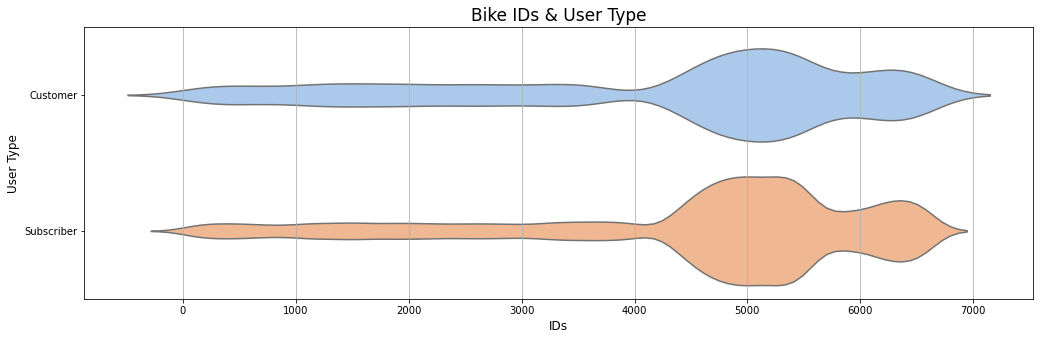

In [150]:
# Distribution of bike rides by the bike ids and hued by user types
plt.figure(figsize=(17,5))
sb.violinplot(data=df2, x='bike_id', y='user_type', palette=color, inner=None)
plt.xlabel('IDs', size=12)
plt.ylabel('User Type', size=12)
plt.title('Bike IDs & User Type', size=17)
plt.gca().xaxis.grid()
plt.show()

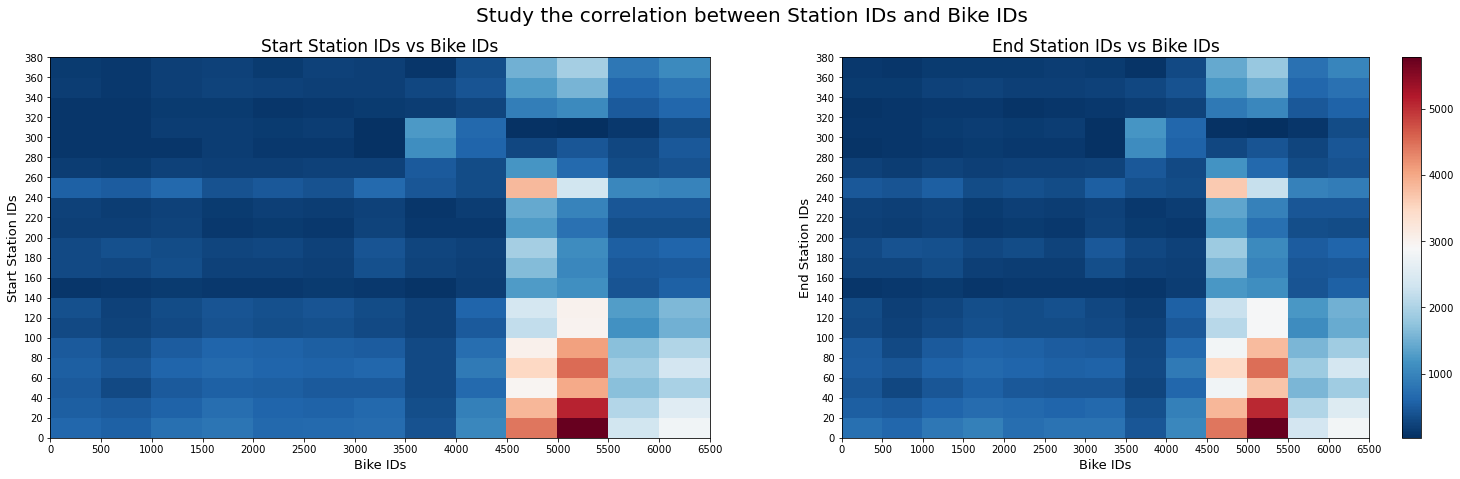

In [153]:
# Heatmap of bike rides by the bike ids and the start and end station ids
bins_x = np.arange(0,7000,500)
labels_x = ['{}'.format(v) for v in bins_x]
bins_y = np.arange(0,400,20)
labels_y = ['{}'.format(v) for v in bins_y]

plt.figure(figsize=(26,7))
plt.suptitle('Study the correlation between Station IDs and Bike IDs', size=20)
plt.subplot(121)
h2d = plt.hist2d(data=df2, x='bike_id', y='start_station_id', cmin=0.5, cmap='RdBu_r', bins=[bins_x, bins_y])
plt.title('Start Station IDs vs Bike IDs', size=17)
plt.xlabel('Bike IDs', size=13)
plt.ylabel('Start Station IDs', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)

plt.subplot(122)
h2d = plt.hist2d(data=df2, x='bike_id', y='end_station_id', cmin=0.5, cmap='RdBu_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.title('End Station IDs vs Bike IDs', size=17)
plt.xlabel('Bike IDs', size=13)
plt.ylabel('End Station IDs', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)
plt.show()

> **There are a lot of bike rides between the stations with ids less than 100 and these stations use the bikes with ids ranging from 4500 to 5500, which explains the high usage rate of these bikes.**

#### Start & End Hours

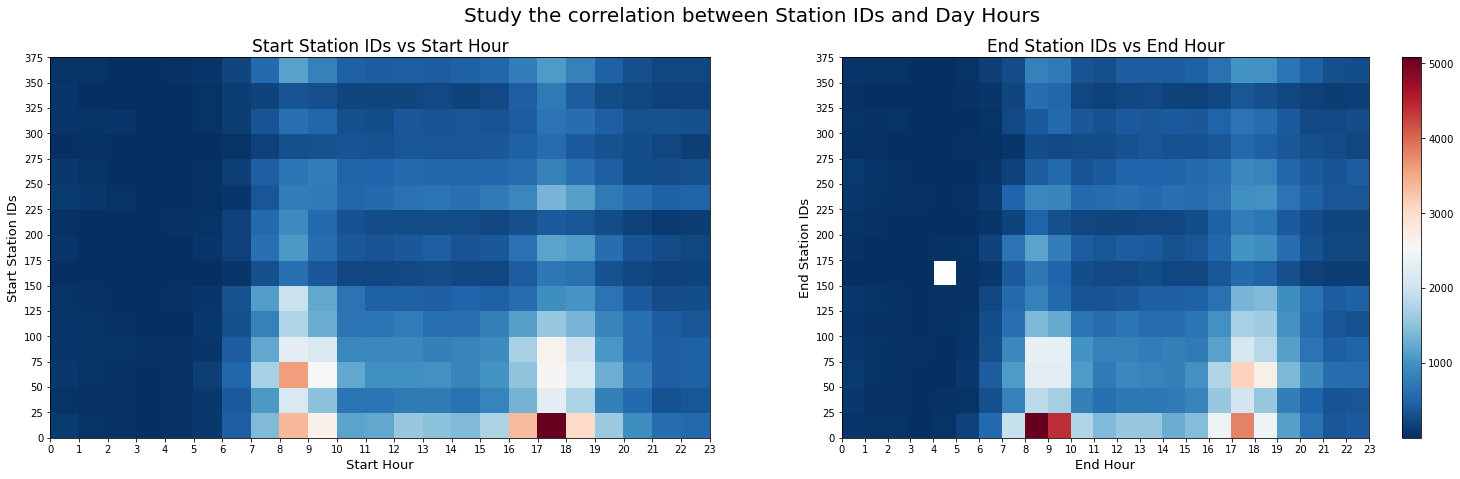

In [155]:
# Heatmap of bike rides by the day 24 hours and the start and end station ids
bins_x = np.arange(0,24)
labels_x = ['{}'.format(v) for v in bins_x]
bins_y = np.arange(0,400,25)
labels_y = ['{}'.format(v) for v in bins_y]

plt.figure(figsize=(26,7))
plt.suptitle('Study the correlation between Station IDs and Day Hours', size=20)
plt.subplot(121)
h2d = plt.hist2d(data=df2, x='start_hour', y='start_station_id', cmin=0.5, cmap='RdBu_r', bins=[bins_x, bins_y])
plt.title('Start Station IDs vs Start Hour', size=17)
plt.xlabel('Start Hour', size=13)
plt.ylabel('Start Station IDs', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)

plt.subplot(122)
h2d = plt.hist2d(data=df2, x='end_hour', y='end_station_id', cmin=0.5, cmap='RdBu_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.title('End Station IDs vs End Hour', size=17)
plt.xlabel('End Hour', size=13)
plt.ylabel('End Station IDs', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)
plt.show()

> **As explained before that stations with ids less than 100 have more bike rides than other stations especially at work hours.**

#### Ride Duartion & Stations

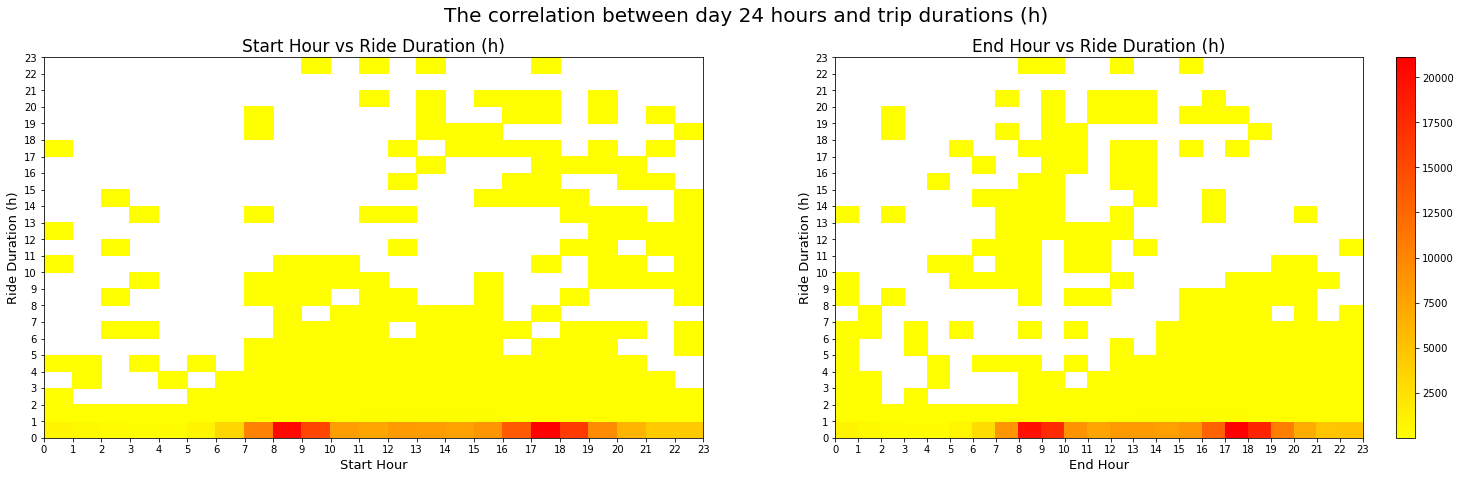

In [172]:
# Heatmap of bike rides by the day 24 hours and the trip durations in hours
bins_x = np.arange(0,24)
labels_x = ['{}'.format(v) for v in bins_x]
bins_y = np.arange(0,24)
labels_y = ['{}'.format(v) for v in bins_y]

plt.figure(figsize=(26,7))
plt.suptitle('The correlation between day 24 hours and trip durations (h)', size=20)
plt.subplot(121)
h2d = plt.hist2d(data=df2, x='start_hour', y='duration_hour', cmin=0.5, cmap='autumn_r', bins=[bins_x, bins_y])
plt.title('Start Hour vs Ride Duration (h)', size=17)
plt.xlabel('Start Hour', size=13)
plt.ylabel('Ride Duration (h)', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)


plt.subplot(122)
h2d = plt.hist2d(data=df2, x='end_hour', y='duration_hour', cmin=0.5, cmap='autumn_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.title('End Hour vs Ride Duration (h)', size=17)
plt.xlabel('End Hour', size=13)
plt.ylabel('Ride Duration (h)', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)
plt.show()

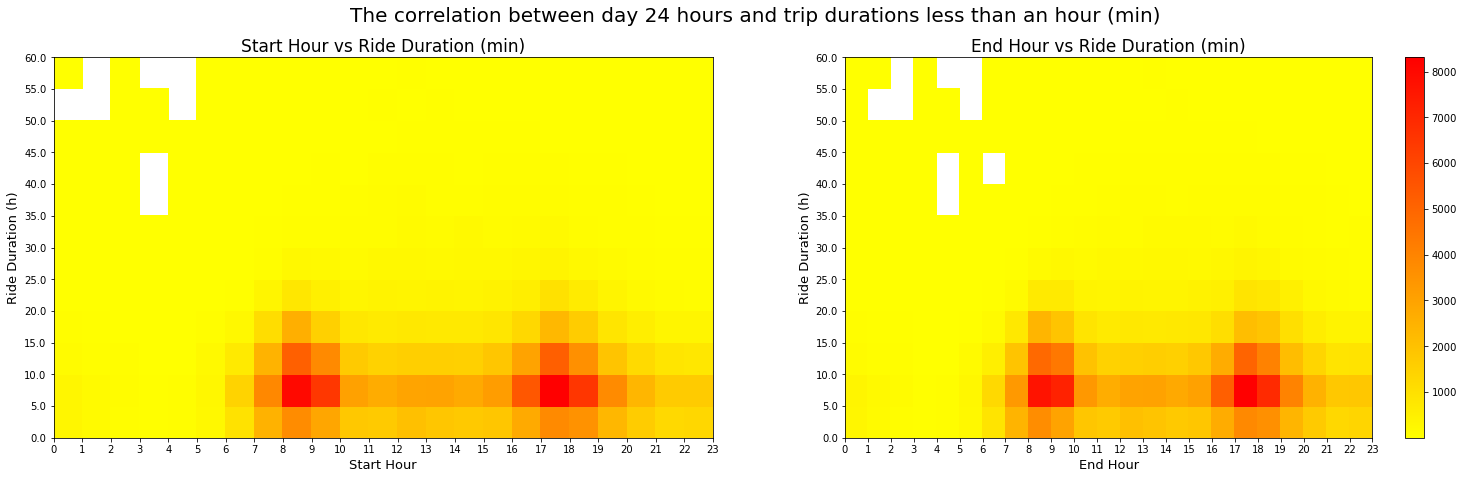

In [168]:
# Heatmap of bike rides by the day 24 hours and the trip durations that are less than an hour
bins_x = np.arange(0,24)
labels_x = ['{}'.format(v) for v in bins_x]
bins_y = np.arange(0, df2.duration_min.quantile(0.99)+5, 5)
labels_y = ['{}'.format(v) for v in bins_y]

plt.figure(figsize=(26,7))
plt.suptitle('The correlation between day 24 hours and trip durations less than an hour (min)', size=20)
plt.subplot(121)
h2d = plt.hist2d(data=df2, x='start_hour', y='duration_min', cmin=0.5, cmap='autumn_r', bins=[bins_x, bins_y])
plt.title('Start Hour vs Ride Duration (min)', size=17)
plt.xlabel('Start Hour', size=13)
plt.ylabel('Ride Duration (h)', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)


plt.subplot(122)
h2d = plt.hist2d(data=df2, x='end_hour', y='duration_min', cmin=0.5, cmap='autumn_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.title('End Hour vs Ride Duration (min)', size=17)
plt.xlabel('End Hour', size=13)
plt.ylabel('Ride Duration (h)', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)
plt.show()

> **Most bike rides durations are less than an hour and it is very clear by now that they are during work hours.**
>
> **Most bike rides take time between 5 and 10 miutes and between 7 and 10 and 17 and 19 hours.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most bike rides start and end on the same day.<br>
>
> The bikes in the stations with ids less than 100 were used so much more than any other bikes especially during work hours.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Only a very small number of people are enrolled in Bike Share for ALL program and they all have a subscribtion.

## Multivariate Exploration

> I will create plots of three or more variables to investigate the data even
further.

In [131]:
df2.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hour,start_date,start_day,end_date,end_day,start_hour,end_hour,same_start_end_station,one_day_trip,two_day_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.75,14.50,2019-02-28,Thursday,2019-03-01,Friday,17,8,NaN,NaN,Thursday/Friday
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.68,11.81,2019-02-28,Thursday,2019-03-01,Friday,18,6,NaN,NaN,Thursday/Friday


E:\Anaconda_Setup\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


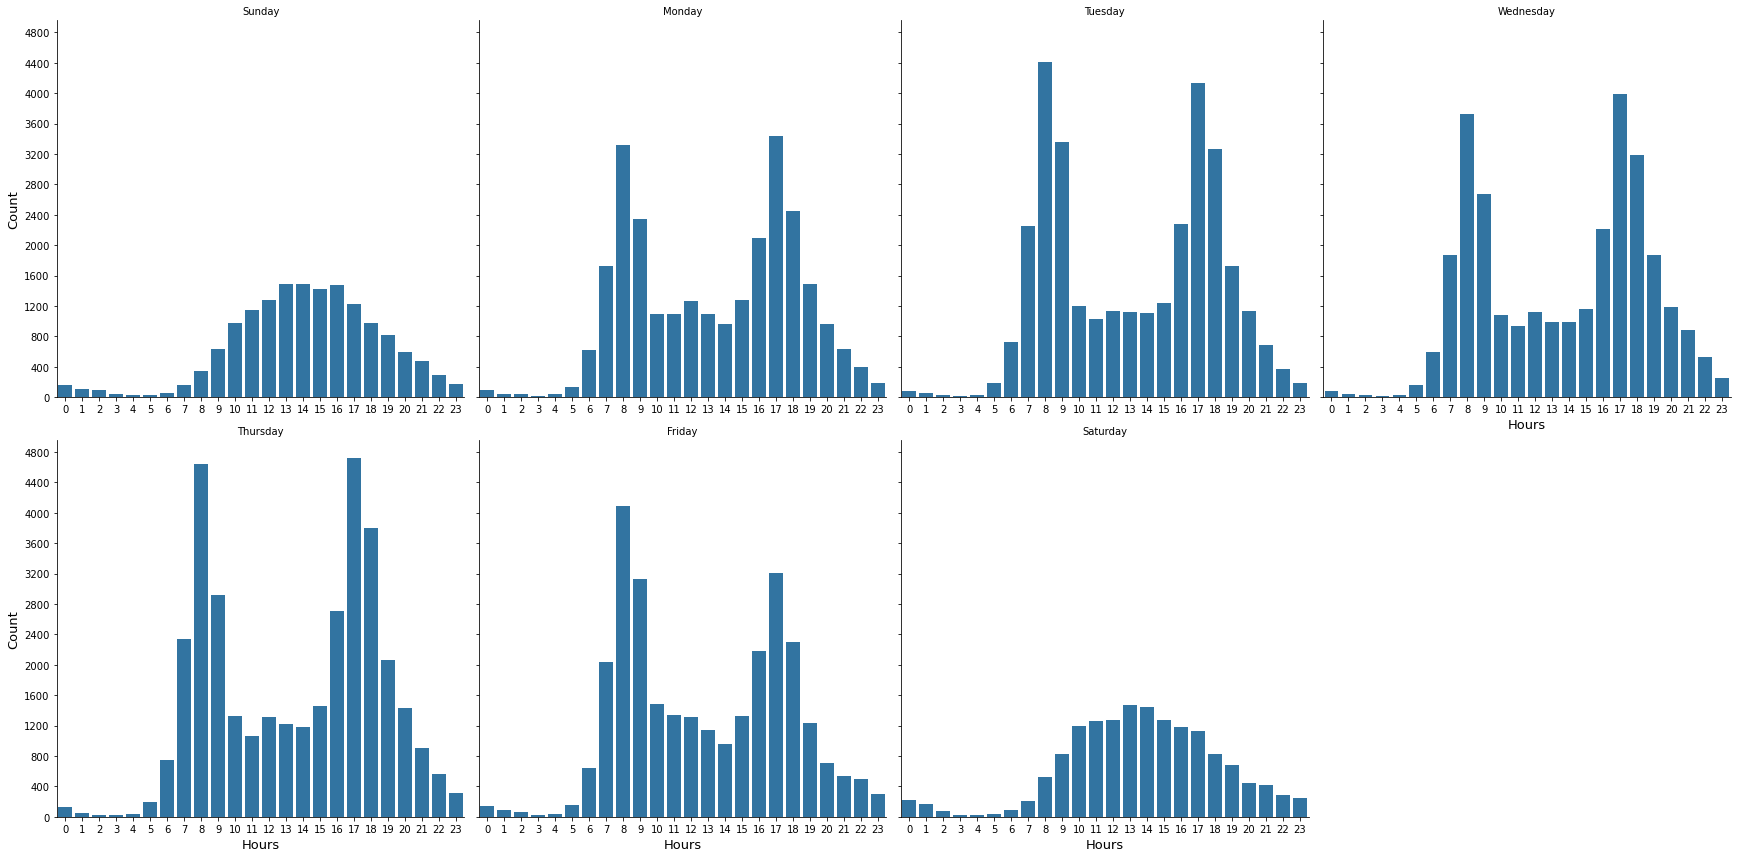

In [169]:
# Displaying The count of bike rides by the bike ride start weekdays and start hour
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ticks = np.arange(0,5000,400)
labels = ['{}'.format(v) for v in ticks]

g = sb.FacetGrid(data=df2, col = 'start_day', col_wrap = 4, size=6, col_order=order, sharex=False)
g.map(sb.countplot, 'start_hour', order=np.arange(0,24))
g.set_titles('{col_name}', size=10);
g.set_axis_labels('Hours','Count', size=13)
plt.yticks(ticks, labels)
plt.show()

E:\Anaconda_Setup\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


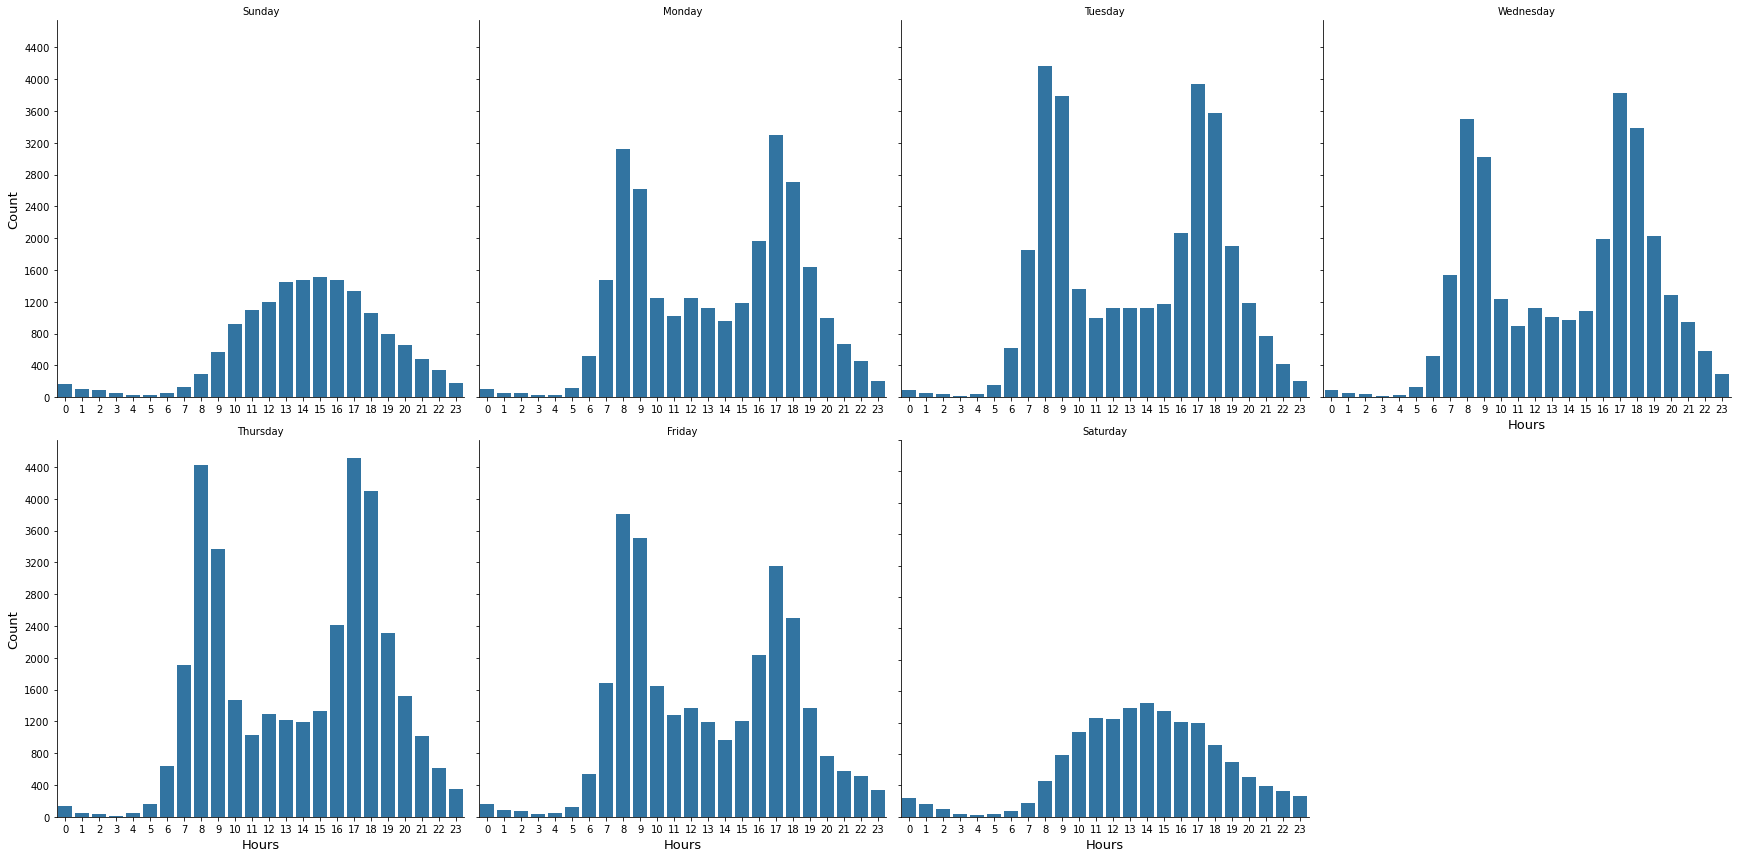

In [170]:
# Displaying The count of bike rides by the bike ride end weekdays and end hour
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ticks = np.arange(0,5000,400)
labels = ['{}'.format(v) for v in ticks]

g = sb.FacetGrid(data=df2, col = 'end_day', col_wrap = 4, size=6, col_order=order, sharex=False)
g.map(sb.countplot, 'end_hour', order=np.arange(0,24))
g.set_titles('{col_name}', size=10);
g.set_axis_labels('Hours','Count', size=13)
plt.yticks(ticks, labels)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The number of bike rides is the lowest in weekends and rises up in work days ,but it is noticeable that during work days they start the lowest at Mondays and increase slightly till they reach their maximum points at Thursdays.

### Were there any interesting or surprising interactions between features?

> No, reaching this point the data was quite clear and well explained.